# Import Libraries

In [2]:
!pip install wordcloud

In [3]:
# Import Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from babel.numbers import format_currency
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
pio.templates.default = "plotly_dark"
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

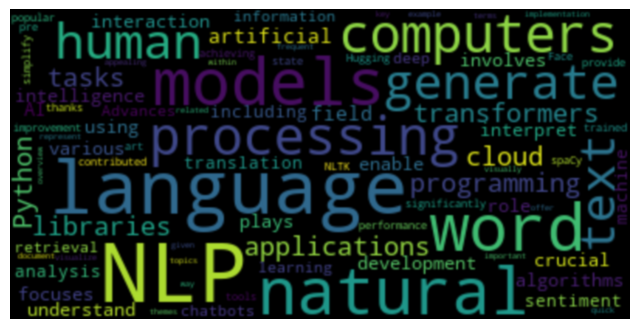

In [46]:
# WordCloud Code Demonstration
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Example text data
text_data = """
Natural language processing (NLP) is a field of artificial intelligence (AI) that focuses on the interaction between computers and humans using natural language. It involves the development of algorithms and models to enable computers to understand, interpret, and generate human-like text.

NLP plays a crucial role in various applications, including machine translation, sentiment analysis, chatbots, and information retrieval. Advances in deep learning have significantly contributed to the improvement of NLP tasks, with models like transformers achieving state-of-the-art performance.

Python is a popular programming language for NLP tasks, thanks to libraries like NLTK, spaCy, and Hugging Face's Transformers. These libraries provide tools and pre-trained models that simplify the implementation of NLP applications.

Word clouds are a visually appealing way to represent the most frequent words in a given text. They offer a quick overview of the key themes and topics within a document. In this example, we generate a word cloud to visualize the important terms related to natural language processing and Python programming.
"""

# Create WordCloud object
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black').generate(text_data)

# Display the WordCloud using Matplotlib
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bicubic')
plt.axis('off')
plt.show()

# Dataset Loading

In [5]:
# Loading Dataset
shark_tank = pd.read_csv(r'C:\Users\ARPAN PANIGRAHI\Downloads\DATA ANALYST-PYTHON-PROJECTS\3. EDA on Shark Tank India Data/Shark Tank India.csv')
shark_tank

Season Number      Startup Name Season Start Season End  Episode Number  \
0                1     BluePineFoods    20-Dec-21  04-Feb-22               1   
1                1      BoozScooters    20-Dec-21  04-Feb-22               1   
2                1  HeartUpMySleeves    20-Dec-21  04-Feb-22               1   
3                1         TagzFoods    20-Dec-21  04-Feb-22               2   
4                1      HeadAndHeart    20-Dec-21  04-Feb-22               2   
..             ...               ...          ...        ...             ...   
316              2            GODESi    02-Jan-23  10-Mar-23              51   
317              2               TAC    02-Jan-23  10-Mar-23              51   
318              2        Naara-Aaba    02-Jan-23  10-Mar-23              51   
319              2          StyloBug    02-Jan-23  10-Mar-23              51   
320              2           ZenOnco    02-Jan-23  10-Mar-23               0   

                   Episode Title           Anchor  Pitch Number  \
0    Badlegi Business Ki Tasveer  Rannvijay Singh             1   
1    Badlegi Business Ki Tasveer  Rannvijay Singh             2   
2    Badlegi Business Ki Tasveer  Rannvijay Singh             3   
3        Insaan, Ideas Aur Sapne  Rannvijay Singh             4   
4        Insaan, Ideas Aur Sapne  Rannvijay Singh             5   
..                           ...              ...           ...   
316  Gateway To Shark Tank India        Rahul Dua           317   
317  Gateway To Shark Tank India        Rahul Dua           318   
318  Gateway To Shark Tank India        Rahul Dua           319   
319  Gateway To Shark Tank India        Rahul Dua           320   
320                       Unseen        Rahul Dua           321   

                         Industry  \
0                            Food   
1    Vehicles/Electrical Vehicles   
2                  Beauty/Fashion   
3                            Food   
4                       Education   
..                            ...   
316                          Food   
317                Beauty/Fashion   
318              Liquor/Beverages   
319                Beauty/Fashion   
320                Medical/Health   

                                  Business Description  ... Guest Name  \
0                                         Frozen Momos  ...        NaN   
1        Renting e-bike for mobility in private spaces  ...        NaN   
2                                   Detachable Sleeves  ...        NaN   
3                          Healthy Potato Chips Snacks  ...        NaN   
4                             Brain Development Course  ...        NaN   
..                                                 ...  ...        ...   
316                                 Handmade lollipops  ...        NaN   
317  ayurveda co for glowing skin, makeup & open pores  ...      Vikas   
318                                pears and plum wine  ...      Vikas   
319                               Girls Dresses Online  ...        NaN   
320                           saving lives from cancer  ...        NaN   

     Ashneer Present  Namita Present  Anupam Present  Vineeta Present  \
0                1.0             1.0             1.0              1.0   
1                1.0             1.0             1.0              1.0   
2                1.0             1.0             1.0              1.0   
3                1.0             1.0             1.0              1.0   
4                1.0             1.0             1.0              1.0   
..               ...             ...             ...              ...   
316              NaN             1.0             NaN              1.0   
317              NaN             1.0             NaN              1.0   
318              NaN             1.0             NaN              1.0   
319              NaN             1.0             NaN              1.0   
320              NaN             1.0             NaN              1.0   

     Aman Present Peyush Pre

# Exploring the Data

In [14]:
# Dataset First View

In [15]:
# Set the display options to show all columns
pd.set_option('display.max_columns', None)

In [16]:
# First Look

# Checking the first 5 rows of data
shark_tank.head()

Season Number      Startup Name Season Start Season End  Episode Number  \
0              1     BluePineFoods    20-Dec-21  04-Feb-22               1   
1              1      BoozScooters    20-Dec-21  04-Feb-22               1   
2              1  HeartUpMySleeves    20-Dec-21  04-Feb-22               1   
3              1         TagzFoods    20-Dec-21  04-Feb-22               2   
4              1      HeadAndHeart    20-Dec-21  04-Feb-22               2   

                 Episode Title           Anchor  Pitch Number  \
0  Badlegi Business Ki Tasveer  Rannvijay Singh             1   
1  Badlegi Business Ki Tasveer  Rannvijay Singh             2   
2  Badlegi Business Ki Tasveer  Rannvijay Singh             3   
3      Insaan, Ideas Aur Sapne  Rannvijay Singh             4   
4      Insaan, Ideas Aur Sapne  Rannvijay Singh             5   

                       Industry  \
0                          Food   
1  Vehicles/Electrical Vehicles   
2                Beauty/Fashion   
3                          Food   
4                     Education   

                            Business Description  \
0                                   Frozen Momos   
1  Renting e-bike for mobility in private spaces   
2                             Detachable Sleeves   
3                    Healthy Potato Chips Snacks   
4                       Brain Development Course   

                 Company Website  Number of Presenters  Male Presenters  \
0     https://bluepinefoods.com/                     3              2.0   
1        https://www.boozup.net/                     1              1.0   
2  https://heartupmysleeves.com/                     1              NaN   
3         https://tagzfoods.com/                     2              2.0   
4             https://thehnh.in/                     4              1.0   

   Female Presenters  Transgender Presenters  Couple Presenters  \
0                1.0                     NaN                0.0   
1                NaN                     NaN                0.0   
2                1.0                     NaN                0.0   
3                NaN                     NaN                0.0   
4                3.0                     NaN                1.0   

  Pitchers Average Age  Started in Pitchers City Pitchers State  \
0               Middle      2016.0         Delhi          Delhi   
1                Young      2017.0     Ahmedabad        Gujarat   
2                Young      2021.0         Delhi          Delhi   
3               Middle      2019.0     Bangalore      Karnataka   
4               Middle      2015.0       Patiala         Punjab   

   Yearly Revenue  Monthly Sales  Gross Margin  Net Margin  \
0            95.0            8.0           NaN         NaN   
1             4.0            0.4           NaN         NaN   
2             NaN            2.0           NaN         NaN   
3           700.0            NaN          48.0         NaN   
4            30.0            NaN           NaN         NaN   

   Original Ask Amount  Original Offered Equity  Valuation Requested  \
0                 50.0                      5.0               1000.0   
1                 40.0                     15.0                267.0   
2                 25.0                     10.0                250.0   
3                 70.0                      1.0               7000.0   
4                 50.0                      5.0               1000.0   

   Received Offer  Accepted Offer  Total Deal Amount  Total Deal Equity  \
0               1             1.0               75.0              16.00   
1               1             1.0               40.0              50.00   
2               1             1.0               25.0              30.00   
3               1             1.0               70.0               2.75   
4               0             NaN                NaN                NaN   

   Total Deal Debt  Debt Interest  Deal Valuation  Number of sharks in deal  \
0              NaN        

In [17]:
# Checking the bottom 5 rows of the data
shark_tank.tail()

Season Number Startup Name Season Start Season End  Episode Number  \
316              2       GODESi    02-Jan-23  10-Mar-23              51   
317              2          TAC    02-Jan-23  10-Mar-23              51   
318              2   Naara-Aaba    02-Jan-23  10-Mar-23              51   
319              2     StyloBug    02-Jan-23  10-Mar-23              51   
320              2      ZenOnco    02-Jan-23  10-Mar-23               0   

                   Episode Title     Anchor  Pitch Number          Industry  \
316  Gateway To Shark Tank India  Rahul Dua           317              Food   
317  Gateway To Shark Tank India  Rahul Dua           318    Beauty/Fashion   
318  Gateway To Shark Tank India  Rahul Dua           319  Liquor/Beverages   
319  Gateway To Shark Tank India  Rahul Dua           320    Beauty/Fashion   
320                       Unseen  Rahul Dua           321    Medical/Health   

                                  Business Description  \
316                                 Handmade lollipops   
317  ayurveda co for glowing skin, makeup & open pores   
318                                pears and plum wine   
319                               Girls Dresses Online   
320                           saving lives from cancer   

                Company Website  Number of Presenters  Male Presenters  \
316          https://godesi.in/                     2              1.0   
317  https://theayurvedaco.com/                     2              1.0   
318  https://www.naaraaaba.com/                     2              1.0   
319       https://stylobug.com/                     2              1.0   
320         https://zenonco.io/                     2              1.0   

     Female Presenters  Transgender Presenters  Couple Presenters  \
316                1.0                     NaN                0.0   
317                1.0                     NaN                1.0   
318                1.0                     NaN                1.0   
319                1.0                     NaN                NaN   
320                1.0                     NaN                0.0   

    Pitchers Average Age  Started in Pitchers City     Pitchers State  \
316               Middle         NaN     Bangalore          Karnataka   
317               Middle         NaN        Mumbai        Maharashtra   
318               Middle      2017.0          Ziro  Arunachal Pradesh   
319               Middle         NaN         Delhi              Delhi   
320               Middle         NaN       Jodhpur          Rajasthan   

     Yearly Revenue  Monthly Sales  Gross Margin  Net Margin  \
316            -1.0          270.0           NaN         NaN   
317            -1.0            NaN           NaN         NaN   
318             NaN            NaN          50.0        18.0   
319          1400.0           46.0           NaN        18.0   
320            -1.0           21.0           NaN         NaN   

     Original Ask Amount  Original Offered Equity  Valuation Requested  \
316                 90.0                      0.5              18000.0   
317                150.0                      0.5              30000.0   
318                 75.0                      2.5               3000.0   
319                 80.0                      2.0               4000.0   
320                100.0                      1.0              10000.0   

     Received Offer  Accepted Offer  Total Deal Amount  Total Deal Equity  \
316               1             0.0                NaN                NaN   
317               1             1.0               81.0                1.0   
318               1             1.0               50.0                5.0   
319               1             1.0               80.0               10.0   
320               1             0.0                NaN                NaN   

     Total Deal Debt  Debt Interest  Deal Valuation  Number of sharks in deal  \
316              NaN            NaN             NaN      

In [18]:
# Dataset Columns
shark_tank.columns

Index(['Season Number', 'Startup Name', 'Season Start', 'Season End',
       'Episode Number', 'Episode Title', 'Anchor', 'Pitch Number', 'Industry',
       'Business Description', 'Company Website', 'Number of Presenters',
       'Male Presenters', 'Female Presenters', 'Transgender Presenters',
       'Couple Presenters', 'Pitchers Average Age', 'Started in',
       'Pitchers City', 'Pitchers State', 'Yearly Revenue', 'Monthly Sales',
       'Gross Margin', 'Net Margin', 'Original Ask Amount',
       'Original Offered Equity', 'Valuation Requested', 'Received Offer',
       'Accepted Offer', 'Total Deal Amount', 'Total Deal Equity',
       'Total Deal Debt', 'Debt Interest', 'Deal Valuation',
       'Number of sharks in deal', 'Deal has conditions', 'Has Patents',
       'Ashneer Investment Amount', 'Ashneer Investment Equity',
       'Ashneer Debt Amount', 'Namita Investment Amount',
       'Namita Investment Equity', 'Namita Debt Amount',
       'Anupam Investment Amount', 'Anupam I

# Dataset Information

In [19]:
# Dataset Info

# Data information. Inspecting each columns and its dtype
shark_tank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 74 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Season Number              321 non-null    int64  
 1   Startup Name               321 non-null    object 
 2   Season Start               321 non-null    object 
 3   Season End                 321 non-null    object 
 4   Episode Number             321 non-null    int64  
 5   Episode Title              321 non-null    object 
 6   Anchor                     321 non-null    object 
 7   Pitch Number               321 non-null    int64  
 8   Industry                   321 non-null    object 
 9   Business Description       321 non-null    object 
 10  Company Website            310 non-null    object 
 11  Number of Presenters       321 non-null    int64  
 12  Male Presenters            282 non-null    float64
 13  Female Presenters          150 non-null    float64

In [20]:
# Dataset Describe

# Checking statistical data on numerical columns
shark_tank.describe()

Season Number  Episode Number  Pitch Number  Number of Presenters  \
count     321.000000      321.000000    321.000000            321.000000   
mean        1.526480       21.482866    161.000000              2.077882   
std         0.500078       14.702695     92.808944              0.846044   
min         1.000000        0.000000      1.000000              1.000000   
25%         1.000000        9.000000     81.000000              2.000000   
50%         2.000000       21.000000    161.000000              2.000000   
75%         2.000000       33.000000    241.000000              2.000000   
max         2.000000       51.000000    321.000000              6.000000   

       Male Presenters  Female Presenters  Transgender Presenters  \
count       282.000000         150.000000                     3.0   
mean          1.719858           1.193333                     1.0   
std           0.866269           0.428775                     0.0   
min           1.000000           1.000000                     1.0   
25%           1.000000           1.000000                     1.0   
50%           2.000000           1.000000                     1.0   
75%           2.000000           1.000000                     1.0   
max           6.000000           3.000000                     1.0   

       Couple Presenters   Started in  Yearly Revenue  Monthly Sales  \
count         316.000000   184.000000      135.000000     141.000000   
mean            0.186709  2018.472826      353.303704      42.191149   
std             0.390296     2.495750      915.969002      90.121564   
min             0.000000  2005.000000       -1.000000       0.000000   
25%             0.000000  2017.000000        0.000000       3.500000   
50%             0.000000  2019.000000      100.000000      14.000000   
75%             0.000000  2020.000000      245.000000      33.000000   
max             1.000000  2022.000000     7200.000000     700.000000   

       Gross Margin  Net Margin  Original Ask Amount  Original Offered Equity  \
count     85.000000   24.000000           321.000000               321.000000   
mean      53.494118   23.500000           168.663555                 4.076293   
std       22.593522   10.615821          1671.576903                 3.624677   
min        3.000000    3.000000             0.000000                 0.200000   
25%       40.000000   18.000000            50.000000                 1.500000   
50%       51.000000   22.500000            65.000000                 3.000000   
75%       69.000000   31.250000           100.000000                 5.000000   
max      150.000000   40.000000         30000.000000                25.000000   

       Valuation Requested  Received Offer  Accepted Offer  Total Deal Amount  \
count           321.000000      321.000000      217.000000         176.000000   
mean           5120.452337        0.676012        0.811060          62.531824   
std            9890.567280        0.468726        0.392366          36.267912   
min               0.000000        0.000000        0.000000           0.000000   
25%            1000.000000        0.000000        1.000000          40.000000   
50%            2000.000000        1.000000        1.000000          50.000000   
75%            5000.000000        1.000000        1.000000          80.000000   
max          120000.000000        1.000000        1.000000         200.000000   

       Total Deal Equity  Total Deal Debt  Debt Interest  Deal Valuation  \
count         176.000000        39.000000      23.000000      176.000000   
mean           10.169432        46.435897      10.260870     1782.786824   
std            10.640055        27.782799       3.683099     2831.961861   
min             0.500000        20.000000       0.000000        0.000000   
25%             3.000000        25.000000      10.000000      324.750000   
50%             6.000000        41.000000      10.000000     1000.000000   
75%            15.000000        50.000000      12.000000   

# Dataset Rows & Columns count

In [21]:
# Dataset Rows & Columns count
shark_tank.shape

(321, 74)

# Duplicate Values

In [22]:
# Dataset Duplicate Value Count
duplicate_values_count = len(shark_tank[shark_tank.duplicated()])

print("Number of duplicate values:", duplicate_values_count)

Number of duplicate values: 0


# Missing Values/Null Values

In [23]:
# Finding Null Values Count
shark_tank.isnull().sum().sort_values(ascending=False)

Ghazal Debt Amount         321
Guest Name                 319
Guest Debt Amount          319
Guest Investment Equity    319
Guest Investment Amount    319
                          ... 
Episode Title                0
Anchor                       0
Pitch Number                 0
Industry                     0
Season Number                0
Length: 74, dtype: int64

Text(0.5, 1.0, 'Places of missing values in the columns')

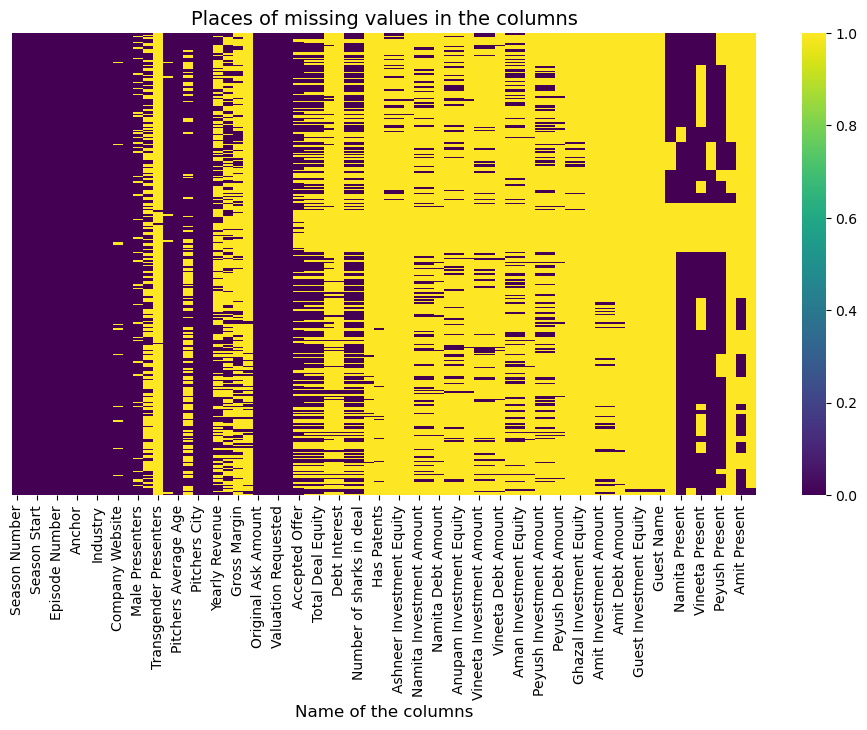

In [24]:
# Visualizing the missing values
# Creating heatmap for null values
plt.figure(figsize = (12,6))
sns.heatmap(shark_tank.isnull(), yticklabels = False, cbar = True, cmap = 'viridis')
plt.xlabel("Name of the columns", fontsize = 12)
plt.title("Places of missing values in the columns", fontsize = 14)

# Correlation Matrix

In [26]:
numeric_df = shark_tank.select_dtypes(include=[np.number])
numeric_df.corr(method='pearson').T.round(2).style.background_gradient(cmap='viridis')

# EDA (Exploratory Data Analysis)

# Season 1 & 2 - Shark Tank India

In [27]:
shark_tank['Season Number'].value_counts()

Season Number
2    169
1    152
Name: count, dtype: int64

In [28]:
print(shark_tank['Season Number'].max(), "seasons \n")
print(shark_tank['Episode Number'].max(), "episodes \n")
print(shark_tank['Pitch Number'].max(), "startup companies came for pitching \n")

2 seasons 

51 episodes 

321 startup companies came for pitching 



# Distribution of Cities from which Pitchers came

In [29]:
print(shark_tank['Pitchers City'].value_counts().head(20))

Pitchers City
Mumbai         56
Delhi          44
Bangalore      32
Pune           20
Ahmedabad      19
Gurgaon        15
Hyderabad      12
Kolkata        12
Noida           7
Jaipur          7
Chennai         6
Surat           6
Ludhiana        4
Thane           3
Indore          3
Goa             3
Gandhinagar     3
Nagpur          3
Jammu           2
Lucknow         2
Name: count, dtype: int64


Text(0.5, 1.0, 'Pitchers Cities Count')

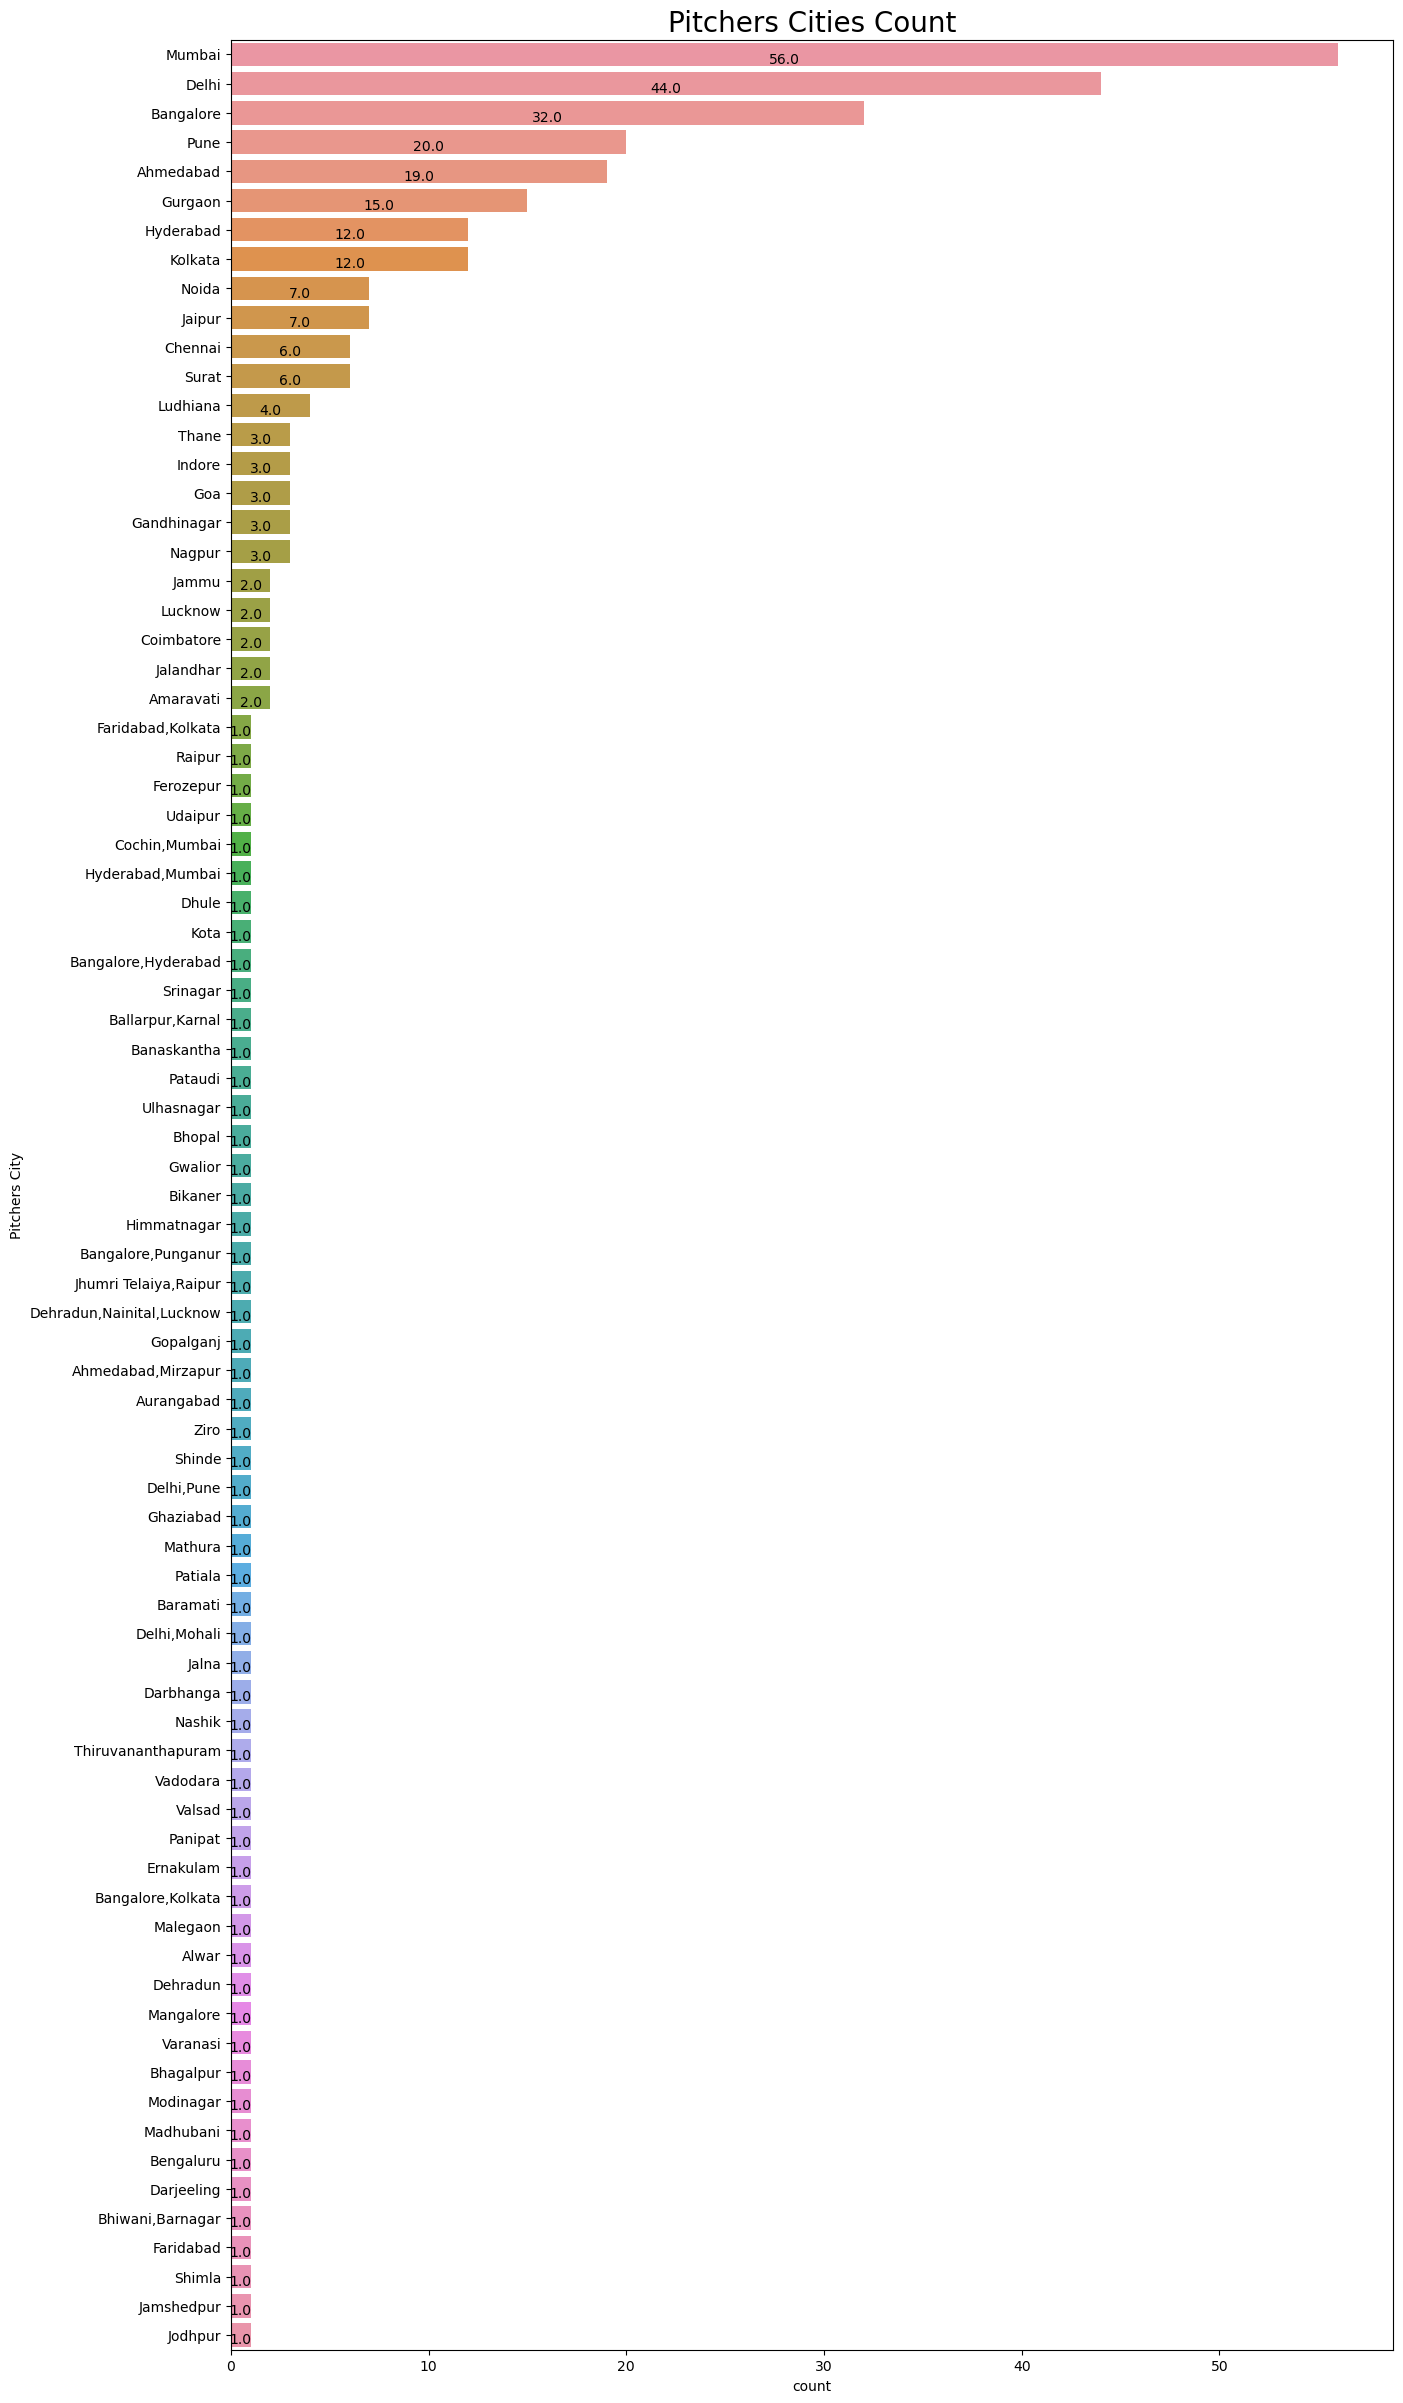

In [30]:
plt.figure(figsize=(15,30))
ax = sns.countplot(data=shark_tank,y='Pitchers City', orient='h',order=shark_tank['Pitchers City'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_x() + p.get_width() / 2, p.get_y() + p.get_height()), ha='center', va='bottom')
plt.title('Pitchers Cities Count',size=20)

# Year in which Startups began their operation

In [31]:
print(shark_tank['Started in'].value_counts(),'\n')

Started in
2019.0    38
2020.0    31
2021.0    27
2018.0    26
2017.0    22
2016.0    18
2022.0     9
2015.0     4
2014.0     4
2005.0     1
2013.0     1
2012.0     1
2006.0     1
2010.0     1
Name: count, dtype: int64 



Text(0.5, 1.0, 'Startup Commencement Year')

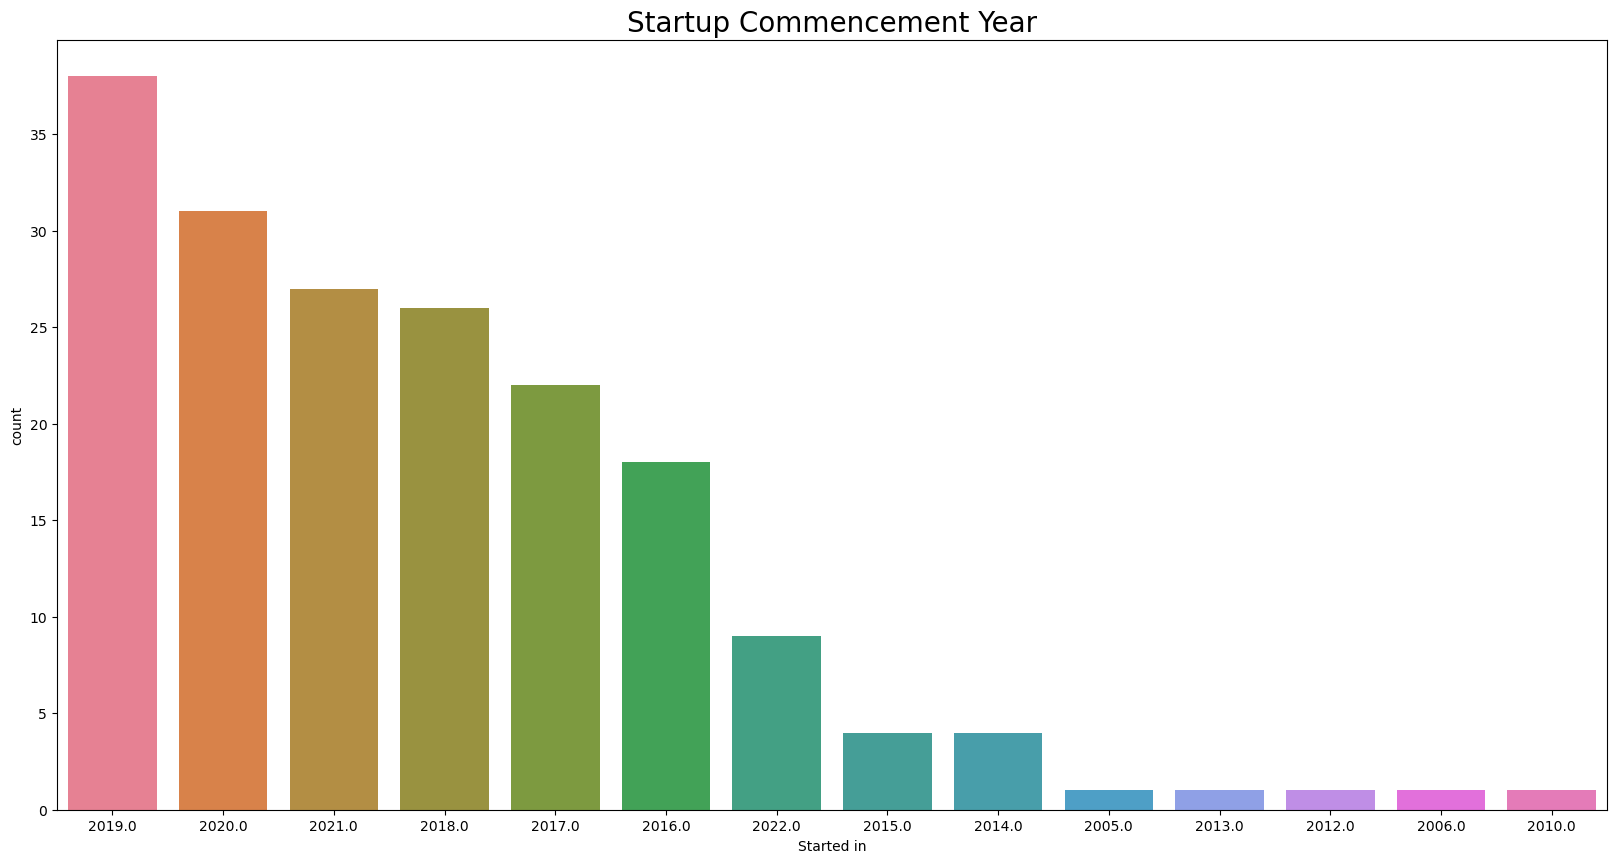

In [32]:
plt.figure(figsize=(20,10))
sns.countplot(data=shark_tank,x='Started in', palette="husl", order=shark_tank['Started in'].value_counts().index)
plt.title('Startup Commencement Year',size=20)

# Distribution of States from which Pitchers came

In [33]:
print(shark_tank['Pitchers State'].value_counts())

Pitchers State
Maharashtra                  92
Delhi                        44
Karnataka                    34
Gujarat                      32
Haryana                      18
Uttar Pradesh                13
West Bengal                  13
Rajasthan                    12
Telangana                    12
Tamil Nadu                    8
Punjab                        8
Madhya Pradesh                5
Bihar                         4
Jammu & Kashmir               3
Goa                           3
Kerala                        2
Kerala,Maharashtra            1
Uttarakhand,Uttar Pradesh     1
Gujarat,Uttar Pradesh         1
Jharkhand,Chhattisgarh        1
Karnataka,Andhra Pradesh      1
Haryana,Maharashtra           1
Chhattisgarh                  1
Haryana,West Bengal           1
Uttarakhand                   1
Telangana,Maharashtra         1
Karnataka,Telangana           1
Jharkhand                     1
Himachal Pradesh              1
Haryana,Madhya Pradesh        1
Delhi,Maharashtra        

Text(0.5, 1.0, 'Startup Commencement Year')

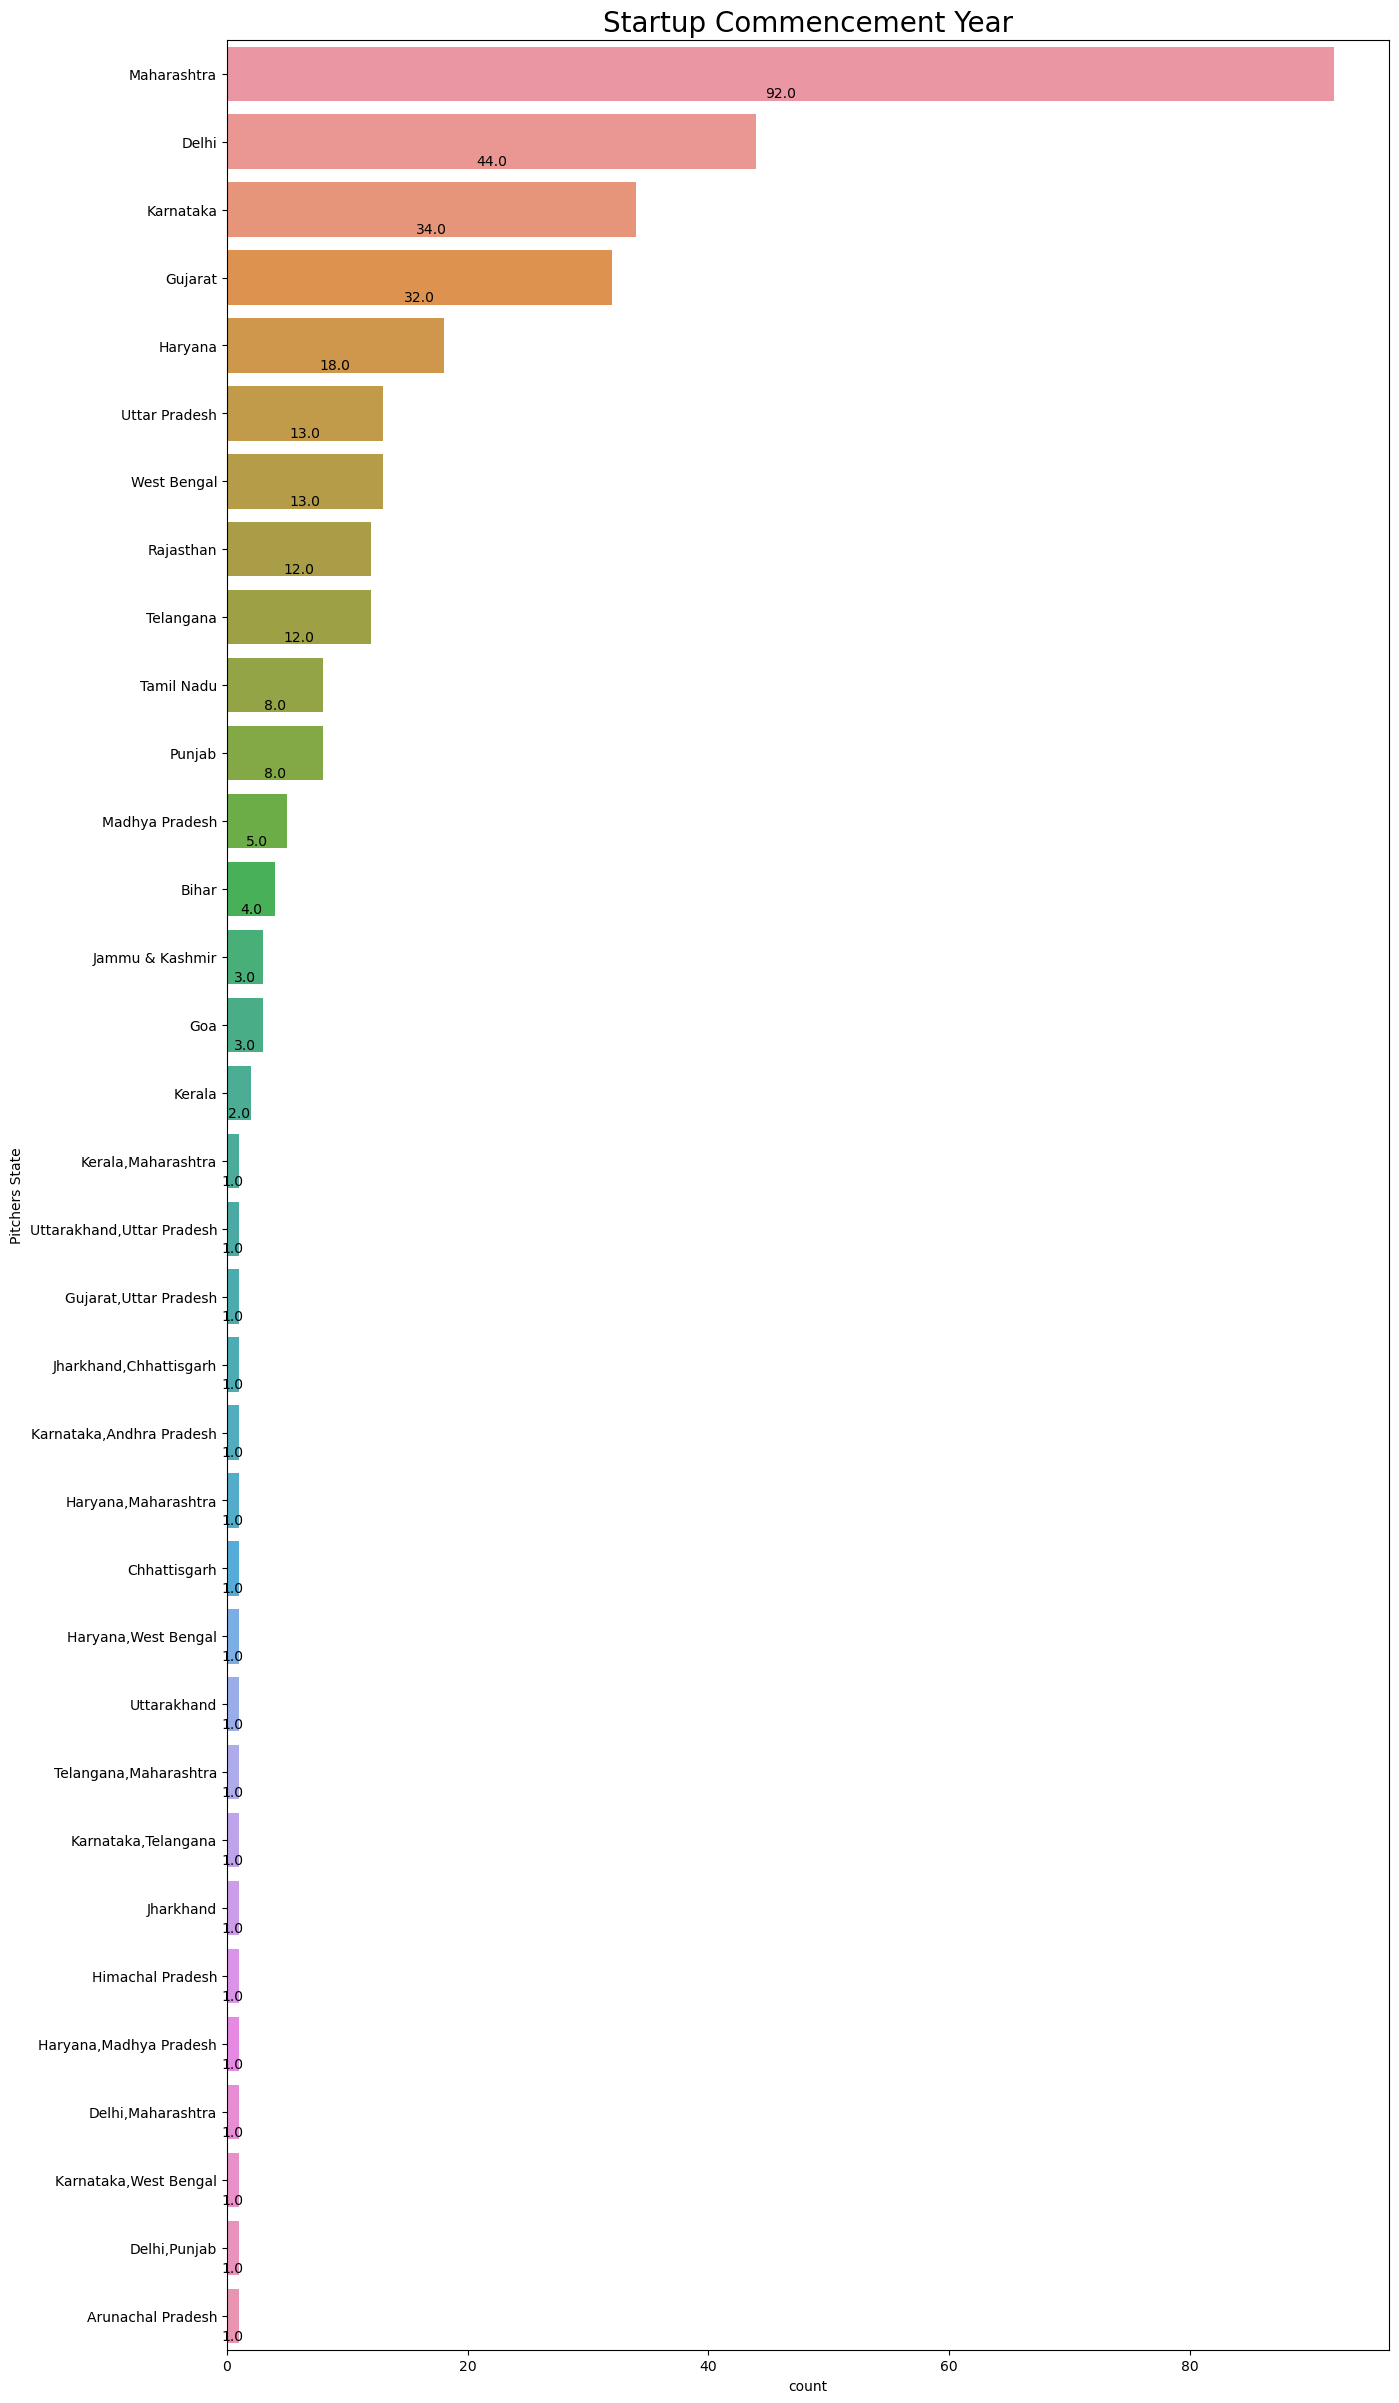

In [34]:
plt.figure(figsize=(15,30))
ax = sns.countplot(data=shark_tank,y='Pitchers State', orient='h',order=shark_tank['Pitchers State'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_x() + p.get_width() / 2, p.get_y() + p.get_height()), ha='center', va='bottom')
plt.title('Startup Commencement Year',size=20)

# Distribution of different Industries that came for pitching

In [35]:
print(shark_tank['Industry'].value_counts())

Industry
Food                            82
Beauty/Fashion                  58
Manufacturing                   38
Services                        28
Technology/Software             26
Medical/Health                  24
Vehicles/Electrical Vehicles    13
Furnishing/Household            13
Education                        9
Sports                           7
Liquor/Beverages                 7
Animal/Pets                      5
Electronics                      4
Agriculture                      3
Hardware                         2
Entertainment                    2
Name: count, dtype: int64


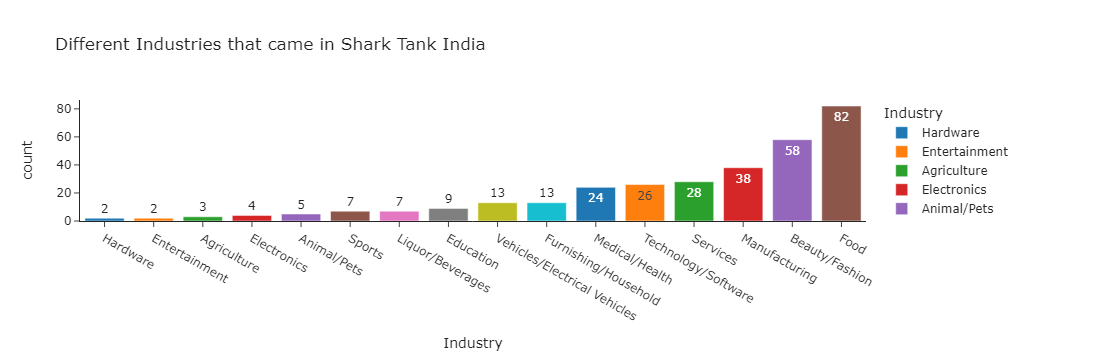

In [38]:
tmp = shark_tank['Industry'].value_counts().sort_values(ascending=True).reset_index()
tmp.columns = ['Industry', 'count']  # Rename columns for clarity

fig = px.bar(tmp, x="Industry", y="count", title="Different Industries that came in Shark Tank India", 
             color='Industry', template='simple_white', text='count')
fig.show()

# Gender Wise Distribution of Entrepreneurs

In [39]:
print("Total pitchers -", int(shark_tank['Number of Presenters'].sum()), "\n")

print("Total Male pitchers -", int(shark_tank['Male Presenters'].sum()), "\n")

print("Total female pitchers -", int(shark_tank['Female Presenters'].sum()), "\n")

print("Male entrepreneurs percentage - ", round(shark_tank['Male Presenters'].sum()/shark_tank['Number of Presenters'].sum()*100,2), "%\n", sep='')
print("Female entrepreneurs percentage - ", round(shark_tank['Female Presenters'].sum()/shark_tank['Number of Presenters'].sum()*100,2), "%\n", sep='')
print("Couple entrepreneurs percentage - ", round(shark_tank.loc[shark_tank['Couple Presenters']==1]['Couple Presenters'].sum()/shark_tank['Number of Presenters'].sum()*100,2), "% (data incomplete)\n", sep='')
     

Total pitchers - 667 

Total Male pitchers - 485 

Total female pitchers - 179 

Male entrepreneurs percentage - 72.71%

Female entrepreneurs percentage - 26.84%

Couple entrepreneurs percentage - 8.85% (data incomplete)



# Top 10 Highest Yearly Revenue of the brands

In [40]:
print(shark_tank.groupby('Startup Name')['Yearly Revenue'].max().nlargest(10))

Startup Name
FrenchCrown          7200.0
Rubans               5100.0
Toyshine             4500.0
GuardianGears        2500.0
GunjanAppsStudios    2400.0
UnStop               1600.0
StyloBug             1400.0
RaisingSuperstars    1300.0
DesmondJi            1200.0
Eume                 1200.0
Name: Yearly Revenue, dtype: float64


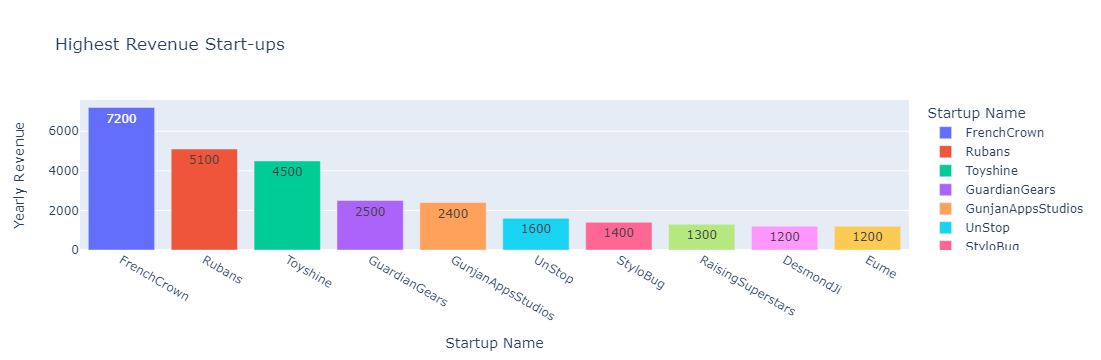

In [41]:
tmpdf = shark_tank.sort_values('Yearly Revenue', ascending=False)[0:10]
fig = px.bar(tmpdf, x="Startup Name", y='Yearly Revenue', color="Startup Name", template='plotly', title="Highest Revenue Start-ups", text=tmpdf['Yearly Revenue'])
fig.show()

# Top 10 highest Gross Margin of different brands

In [42]:
# DataFrame which shows the Top 10 Start-ups which have the highest Gross Margin
shark_tank[['Startup Name','Gross Margin']].sort_values(by='Gross Margin',ascending=False).head(10)

Startup Name  Gross Margin
69       Poo-de-Cologne         150.0
33                Farda         115.0
45              Cocofit          95.0
230              UnStop          90.0
256  MidNightAngelsByPC          83.0
195               Pflow          80.0
225         LeafyAffair          80.0
201              ekatra          80.0
291            oyehappy          80.0
34                 Auli          80.0

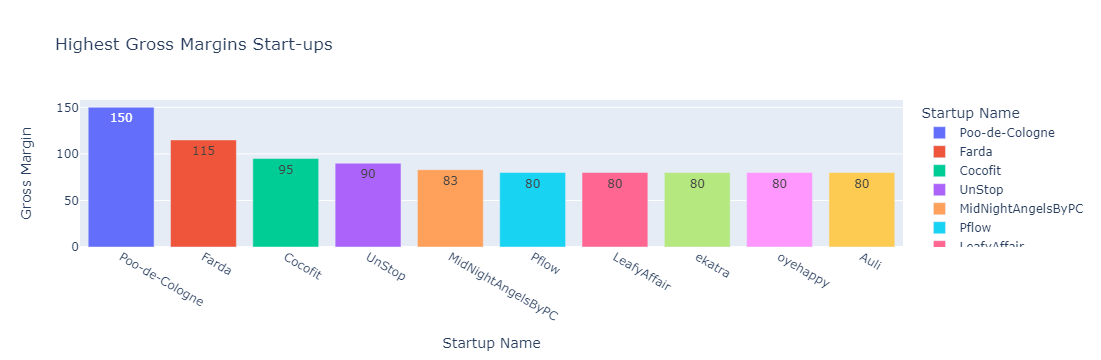

In [43]:
# Visualization Code
highest_gross_margin = shark_tank[['Startup Name','Gross Margin']].sort_values(by='Gross Margin',ascending=False).head(10)
fig = px.bar(highest_gross_margin, x="Startup Name", y='Gross Margin', color="Startup Name", template='plotly', title="Highest Gross Margins Start-ups", text=highest_gross_margin['Gross Margin'])
fig.show()

# How many accepted or rejected sharks offers?

In [44]:
shark_tank['Accepted Offer'].value_counts()

Accepted Offer
1.0    176
0.0     41
Name: count, dtype: int64

In [45]:
# Numbers of Pithers who accepted/rejected shark's offer
print(f"{shark_tank['Accepted Offer'].value_counts().iloc[0]} Pitchers accepted the shark's offer.")
print(f"{shark_tank['Accepted Offer'].value_counts().iloc[1]} Pitchers rejected the shark's offer.")

176 Pitchers accepted the shark's offer.
41 Pitchers rejected the shark's offer.


<Axes: xlabel='Accepted Offer', ylabel='count'>

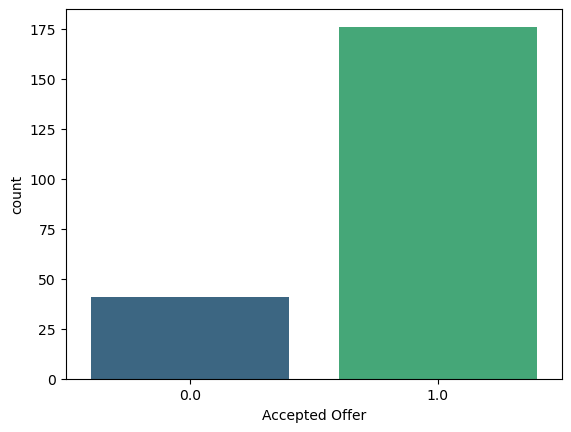

In [46]:
# Visualization Code
sns.countplot(data=shark_tank,x='Accepted Offer',palette='viridis')

# Startup Companies who rejected shark's offer

In [47]:
shark_tank[shark_tank['Accepted Offer'] == 0][['Season Number','Startup Name','Business Description',
                                               'Original Ask Amount','Original Offered Equity',
                                               'Valuation Requested',]]

Season Number        Startup Name  \
6                1          qZenseLabs   
19               1            Torch-it   
21               1         LaKheerDeli   
27               1       KabiraHandmad   
41               1    MorrikoPureFoods   
55               1      IndiaHempandCo   
60               1           KetoIndia   
70               1           Moonshine   
71               1             Falhari   
73               1         UrbanMonkey   
74               1       GuardianGears   
81               1              Alpino   
87               1  AlisteTechnologies   
93               1           PDDFalcon   
94               1           PlayBoxTV   
104              1      ExperentialEtc   
106              1          C3Med-Tech   
113              1        GreenProtein   
116              1               Woloo   
119              1         FrenchCrown   
121              1            Devnagri   
131              1           Scintiglo   
135              1           UrbanNaps   
138              1            Picsniff   
149              1             Artment   
151              1                Eume   
158              2          ATMOSPHERE   
165              2           Flatheads   
189              2             Diabexy   
199              2        AvimeeHerbal   
206              2                 PMV   
212              2      CheeseCake&Co.   
215              2              BeUnic   
229              2          GavinParis   
233              2          HobbyIndia   
237              2            DesiToys   
245              2              Tipayi   
256              2  MidNightAngelsByPC   
278              2      TwistingScoops   
316              2              GODESi   
320              2             ZenOnco   

                                  Business Description  Original Ask Amount  \
6                              Food Freshness Detector                100.0   
19                Gadgets for visually impaired people                 75.0   
21                         Kheer in variety of flavors                 50.0   
27     Healthy Edible Oils dairy products spices flour                100.0   
41                  Healthy Food Snacks Kamdhenu foods                100.0   
55                                  Hemp Food Products                 50.0   
60   Customised Keto Diets for various Medical/Heal...                150.0   
70                                               Meads                 80.0   
71                                 Fresh Fruits salads                 50.0   
73                                          Streetwear                100.0   
74                             Motorcycle Luggage bags                 30.0   
81                      Roasted Peanut butter Products                150.0   
87                                Automation Solutions                 60.0   
93                               Stainless Steel Items                 75.0   
94                                  Streaming Platform                100.0   
104          Technology layered advertisement services                200.0   
106                 Portable ophthalmic vision devices                 35.0   
113                                Plant-Based Protein                 60.0   
116                                    Washroom Finder                 50.0   
119                                            Clothes                150.0   
121                    Translation of language content                100.0   
131  Diagnostic device for microalbuminuria estimation                 75.0   
135                                  Smart Napping Pod                 50.0   
138               Face recognition based image sharing                 55.0   
149                     Exquisite pieces of home decor                170.0   
151                                  Massager Backpack                150.0   
158                              Varieties of kombucha                 75.0   
165                         

# Industry wise Investments By different sharks

# ASHNEER'S INVESTMENT

In [48]:
# Finding the count of various Industries
shark_tank[shark_tank['Ashneer Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False)

Industry
Food                            8
Vehicles/Electrical Vehicles    3
Education                       3
Manufacturing                   2
Beauty/Fashion                  2
Animal/Pets                     1
Sports                          1
Technology/Software             1
Name: count, dtype: int64

<Axes: ylabel='count'>

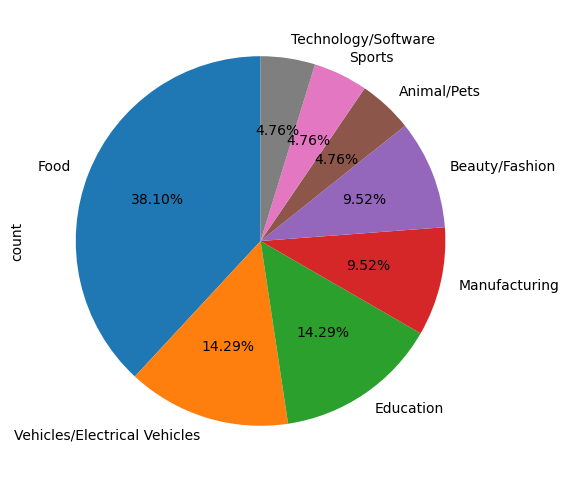

In [49]:
# Plotting the chart
plt.figure(figsize=(12,6))
shark_tank[shark_tank['Ashneer Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%', startangle=90)

In [50]:
# Viewing the DataFrame
tmpdf = shark_tank.loc[shark_tank['Ashneer Investment Amount']>0] [["Startup Name","Ashneer Investment Amount","Ashneer Investment Equity"]].sort_values(by="Ashneer Investment Equity")
tmpdf

Startup Name  Ashneer Investment Amount  Ashneer Investment Equity
56                 Otua                       1.00                       1.00
30            EventBeep                      10.00                       1.00
22          BeyondSnack                      25.00                       1.25
68        HairOriginals                      20.00                       1.33
46          BambooIndia                      25.00                       1.75
64               INACAN                      20.00                       2.00
18    RaisingSuperstars                      50.00                       2.00
59              WeSTOCK                      15.00                       2.50
39        TheYarnBazaar                      25.00                       2.50
3             TagzFoods                      70.00                       2.75
15        SkippiIcePops                      20.00                       3.00
109           TweekLabs                      20.00                       3.33
111    NomadFoodProject                      10.00                       5.00
51         AasVidyalaya                      50.00                       5.00
110              Proxgy                      50.00                       5.00
65           Get-A-Whey                      33.33                       5.00
50   FindYourKicksIndia                      10.00                       5.00
0         BluePineFoods                      25.00                       5.33
24         MotionBreeze                      30.00                       6.00
115        JainShikanji                      10.00                       7.50
1          BoozScooters                      20.00                      25.00

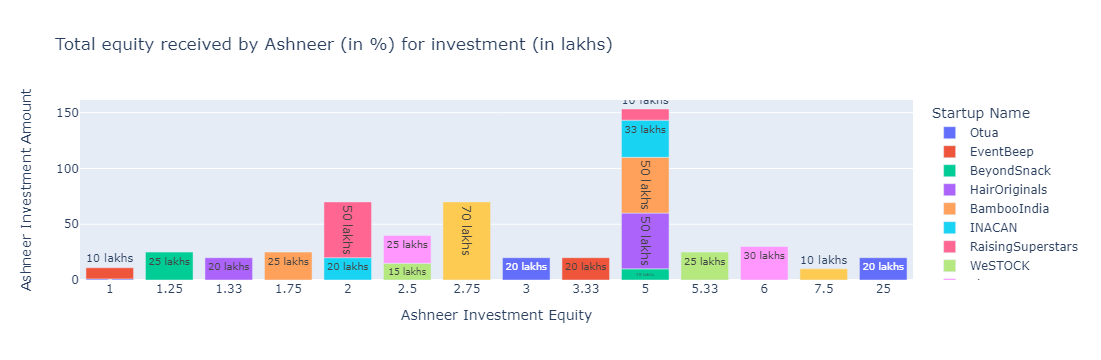

In [51]:
# Visualization Code
tmpdf = shark_tank.loc[shark_tank['Ashneer Investment Amount']>0] [["Startup Name","Ashneer Investment Amount","Ashneer Investment Equity"]].sort_values(by="Ashneer Investment Equity")
fig = px.bar(tmpdf, x="Ashneer Investment Equity", y='Ashneer Investment Amount', color="Startup Name", template='plotly', title="Total equity received by Ashneer (in %) for investment (in lakhs)", text=tmpdf['Ashneer Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

# NAMITA'S INVESTMENT

In [52]:
# Finding the count of various Industries
shark_tank[shark_tank['Namita Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False)

Industry
Beauty/Fashion          13
Medical/Health          12
Food                    11
Manufacturing            8
Services                 6
Technology/Software      5
Education                3
Furnishing/Household     3
Sports                   2
Animal/Pets              1
Entertainment            1
Agriculture              1
Name: count, dtype: int64

<Axes: ylabel='count'>

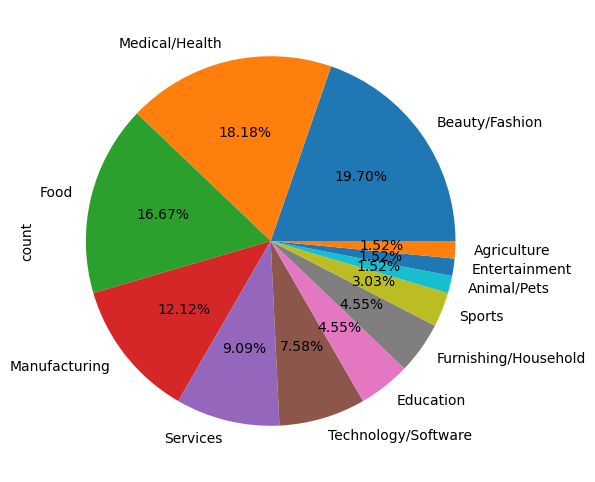

In [53]:
# Plotting the chart
plt.figure(figsize=(12,6))
shark_tank[shark_tank['Namita Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
     

In [54]:
# Viewing the DataFrame
tmpdf = shark_tank.loc[shark_tank['Namita Investment Amount']>0] [["Startup Name","Namita Investment Amount","Namita Investment Equity"]].sort_values(by="Namita Investment Equity")
tmpdf

Startup Name  Namita Investment Amount  Namita Investment Equity
159            Stage                     50.00                     0.200
209           Snitch                     30.00                     0.300
240        MindPeers                     17.66                     0.330
306           Rubans                     33.33                     0.333
279           GROWiT                     25.00                     0.500
..               ...                       ...                       ...
294     LondonBubble                     75.00                    15.000
16      Menstrupedia                     50.00                    20.000
160           Girgit                     20.00                    20.000
107  ColourMeMad-CMM                     40.00                    25.000
264        HoloKitab                     45.00                    25.000

[66 rows x 3 columns]

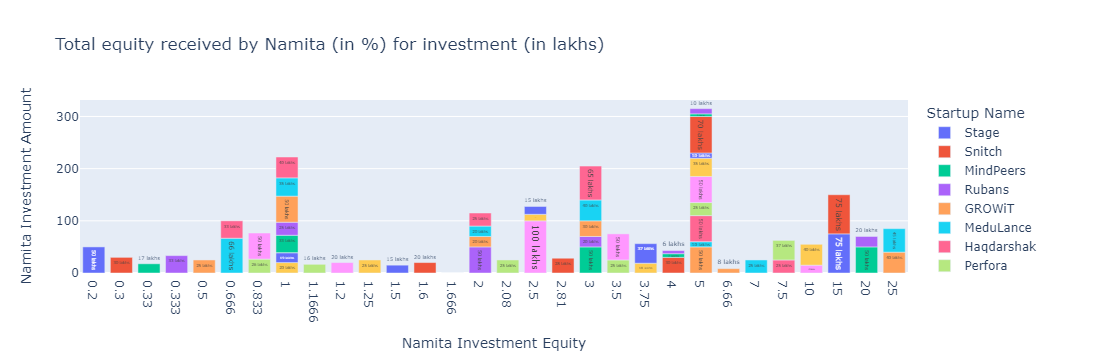

In [55]:
# Visualization Code
tmpdf = shark_tank.loc[shark_tank['Namita Investment Amount']>0] [["Startup Name","Namita Investment Amount","Namita Investment Equity"]].sort_values(by="Namita Investment Equity")
fig = px.bar(tmpdf, x="Namita Investment Equity", y='Namita Investment Amount', color="Startup Name", template='plotly', title="Total equity received by Namita (in %) for investment (in lakhs)", text=tmpdf['Namita Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

# ANUPAM'S INVESTMENT

In [56]:
# Finding the count of various Industries
shark_tank[shark_tank['Anupam Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False)

Industry
Food                            13
Beauty/Fashion                  11
Manufacturing                    7
Medical/Health                   6
Technology/Software              3
Vehicles/Electrical Vehicles     2
Education                        2
Animal/Pets                      1
Sports                           1
Electronics                      1
Liquor/Beverages                 1
Services                         1
Furnishing/Household             1
Name: count, dtype: int64

<Axes: ylabel='count'>

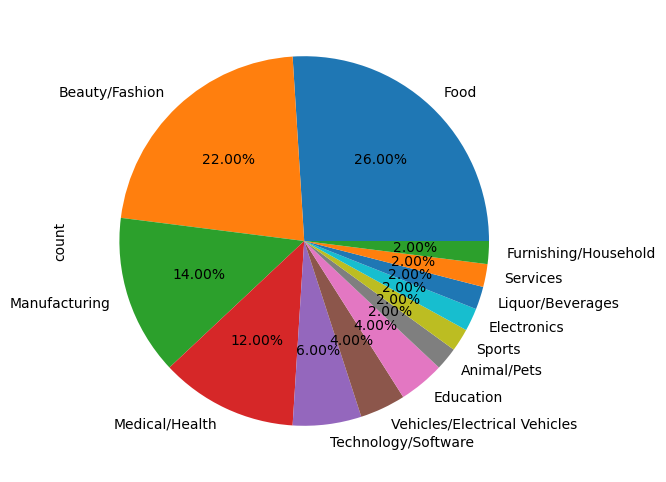

In [57]:
# Plotting the chart
plt.figure(figsize=(12,6))
shark_tank[shark_tank['Anupam Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
     

In [58]:
# Viewing the DataFrame
tmpdf = shark_tank.loc[shark_tank['Anupam Investment Amount']>0] [["Startup Name","Anupam Investment Amount","Anupam Investment Equity"]].sort_values(by="Anupam Investment Equity")
tmpdf

Startup Name  Anupam Investment Amount  \
209                  Snitch                 30.000000   
281                 Trunome                 37.500000   
12               RevampMoto                 50.000000   
86        WattTechnovations                  0.000253   
274             Pharmallama                 40.000000   
230                  UnStop                 50.000000   
37                    Annie                 35.000000   
219                 PadCare                 25.000000   
80       SunfoxTechnologies                 20.000000   
68            HairOriginals                 20.000000   
198                 Solinas                 45.000000   
283        What'sUpWellness                 20.000000   
238               CloudWorx                 20.000000   
45                  Cocofit                  0.000016   
46              BambooIndia                 25.000000   
167                  TeaFit                 12.500000   
162               PatilKaki                 20.000000   
311               Sahayatha                 20.000000   
64                   INACAN                 20.000000   
39            TheYarnBazaar                 25.000000   
15            SkippiIcePops                 20.000000   
190                   Kyari                 25.500000   
109               TweekLabs                 20.000000   
223                  Geeani                 33.330000   
239                Mahantam                  6.000000   
153                   Dorji                 10.000000   
20                   Kavach                  2.500000   
50       FindYourKicksIndia                 10.000000   
164                 Winston                 50.000000   
310           ForeverModest                  5.000000   
156       WatchoutWearables                 50.000000   
49                 Let'sTry                 22.500000   
29                 Meatyour                 10.000000   
249               Homestrap                 50.000000   
224                   Amore                 75.000000   
115            JainShikanji                 10.000000   
36                     LOKA                 13.330000   
218               HoneyVeda                 25.000000   
178             Zillionaire                100.000000   
38               Carragreen                 25.000000   
217                   Ravel                 75.000000   
67           TheQuirkyNaari                 17.500000   
9                     CosIQ                 25.000000   
79                PawsIndia                 50.000000   
32   ARRCOATSurfaceTextures                 50.000000   
2          HeartUpMySleeves                 12.500000   
23       VivalyfInnovations                 28.000000   
76               TheSassBar                 25.000000   
227          SharmaJiKiAata                 40.000000   
202                   Raasa                 50.000000   

     Anupam Investment Equity  
209                     0.300  
281                     0.500  
12                      0.750  
86                      1.000  
274                     1.000  
230                     1.000  
37                      1.000  
219                     1.000  
80                      1.200  
68                      1.330  
198                     1.500  
283                     1.586  
238                     1.600  
45                      1.666  
46                      1.750  
167                     2.000  
162                     2.000  
311                     2.000  
64                      2.000  
39                      2.500  
15                      3.000  
190                     3.000  
109                     3.330  
223                     3.330  
239                     4.000  
153                     5.000  
20                      5.000  
50                      5.000  
164                     5.000  
310                     5.000  
156                     5.000  
49                      6.000  
29                      6.660  
249                

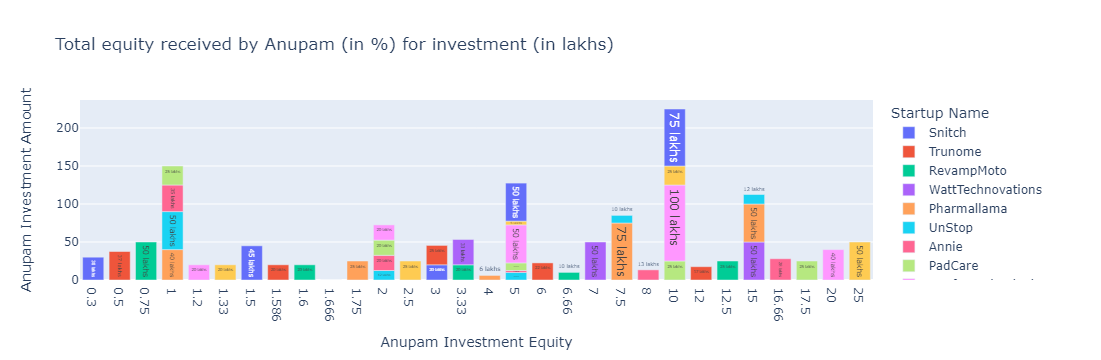

In [59]:
# Visualization Code
tmpdf = shark_tank.loc[shark_tank['Anupam Investment Amount']>0] [["Startup Name","Anupam Investment Amount","Anupam Investment Equity"]].sort_values(by="Anupam Investment Equity")
fig = px.bar(tmpdf, x="Anupam Investment Equity", y='Anupam Investment Amount', color="Startup Name", template='plotly', title="Total equity received by Anupam (in %) for investment (in lakhs)", text=tmpdf['Anupam Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

# VINEETA'S INVESTMENT

In [60]:
# Finding the count of various Industries
shark_tank[shark_tank['Vineeta Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False)

Industry
Food                            17
Beauty/Fashion                  10
Medical/Health                   3
Manufacturing                    3
Vehicles/Electrical Vehicles     2
Liquor/Beverages                 2
Furnishing/Household             2
Sports                           1
Electronics                      1
Technology/Software              1
Services                         1
Name: count, dtype: int64

<Axes: ylabel='count'>

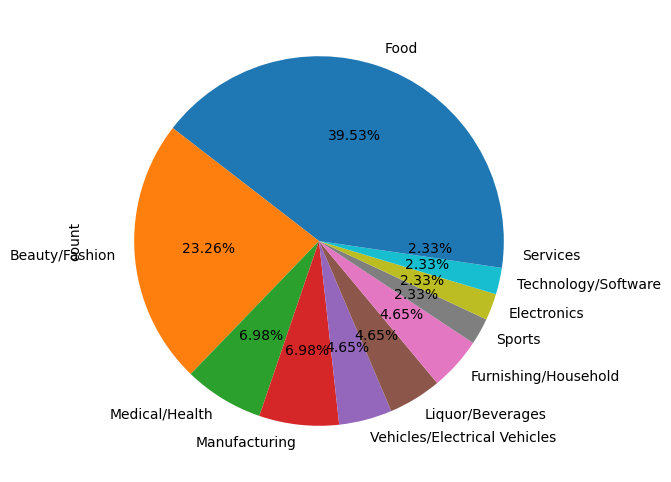

In [61]:
# Plotting the chart
plt.figure(figsize=(12,6))
shark_tank[shark_tank['Vineeta Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')

In [62]:
# Viewing the DataFrame
tmpdf = shark_tank.loc[shark_tank['Vineeta Investment Amount']>0] [["Startup Name","Vineeta Investment Amount","Vineeta Investment Equity"]].sort_values(by="Vineeta Investment Equity")
tmpdf

Startup Name  Vineeta Investment Amount  Vineeta Investment Equity
209              Snitch                      30.00                      0.300
240           MindPeers                      17.66                      0.330
306              Rubans                      33.33                      0.333
281             Trunome                      37.50                      0.500
255             Perfora                      26.66                      0.833
219             PadCare                      25.00                      1.000
176            Paradyes                      32.50                      1.000
80   SunfoxTechnologies                      20.00                      1.200
300    ThePlatedProject                      25.00                      1.250
283    What'sUpWellness                      20.00                      1.586
167              TeaFit                      12.50                      2.000
254            Freakins                      50.00                      2.500
221                 OLL                      15.00                      2.500
220   SwadeshiBlessings                      12.50                      2.500
318          Naara-Aaba                      25.00                      2.500
10          JhaJiAchaar                      28.30                      2.810
96          KabaddiAdda                      40.00                      3.000
15        SkippiIcePops                      20.00                      3.000
223              Geeani                      33.33                      3.330
239            Mahantam                       6.00                      4.000
118            SneaKare                       7.00                      4.000
164             Winston                      50.00                      5.000
310       ForeverModest                       5.00                      5.000
171      TheSimplySalad                      15.00                      5.000
65           Get-A-Whey                      33.33                      5.000
156   WatchoutWearables                      50.00                      5.000
153               Dorji                      10.00                      5.000
89              HumpyA2                      33.33                      5.000
111    NomadFoodProject                      10.00                      5.000
0         BluePineFoods                      25.00                      5.330
292       HealthyMaster                      50.00                      6.500
92           WakaoFoods                      25.00                      7.000
115        JainShikanji                      10.00                      7.500
232       TheGreenSnack                     100.00                      8.000
91    GoldSafeSolutions                      16.66                     10.000
218           HoneyVeda                      25.00                     10.000
296           NutriCook                      50.00                     10.000
67       TheQuirkyNaari                      17.50                     12.000
9                 CosIQ                      25.00                     12.500
8                  NOCD                      20.00                     15.000
2      HeartUpMySleeves                      12.50                     15.000
157               SoupX                      50.00                     18.000
1          BoozScooters                      20.00                     25.000

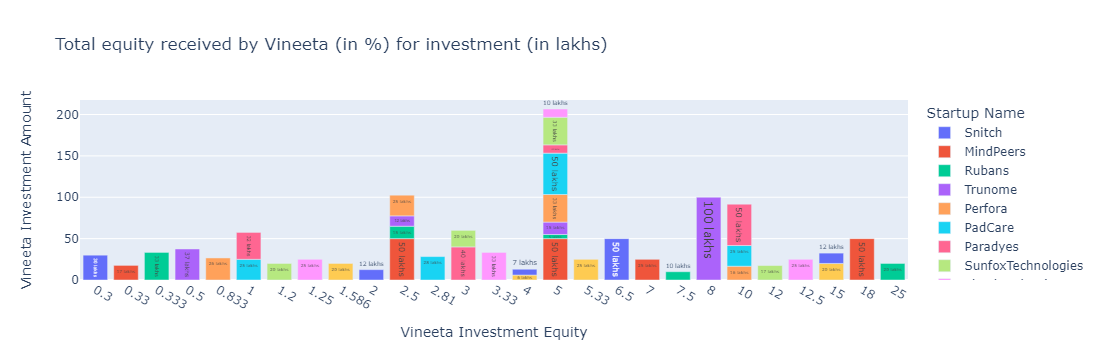

In [63]:
# Visualization Code
tmpdf = shark_tank.loc[shark_tank['Vineeta Investment Amount']>0] [["Startup Name","Vineeta Investment Amount","Vineeta Investment Equity"]].sort_values(by="Vineeta Investment Equity")
fig = px.bar(tmpdf, x="Vineeta Investment Equity", y='Vineeta Investment Amount', color="Startup Name", template='plotly', title="Total equity received by Vineeta (in %) for investment (in lakhs)", text=tmpdf['Vineeta Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

# AMAN'S INVESTMENT

In [64]:
# Finding the count of various Industries
shark_tank[shark_tank['Aman Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False)

Industry
Food                            18
Beauty/Fashion                  14
Medical/Health                   8
Manufacturing                    7
Technology/Software              7
Services                         7
Vehicles/Electrical Vehicles     3
Education                        3
Liquor/Beverages                 2
Electronics                      1
Animal/Pets                      1
Entertainment                    1
Name: count, dtype: int64

<Axes: ylabel='count'>

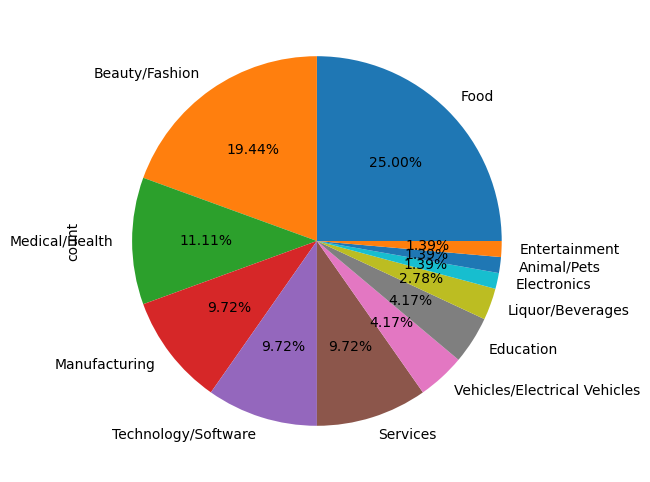

In [65]:
# Plotting the chart
plt.figure(figsize=(12,6))
shark_tank[shark_tank['Aman Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')

In [66]:
# Viewing the DataFrame
tmpdf = shark_tank.loc[shark_tank['Aman Investment Amount']>0] [["Startup Name","Aman Investment Amount","Aman Investment Equity"]].sort_values(by="Aman Investment Equity")
tmpdf

Startup Name  Aman Investment Amount  Aman Investment Equity
159            Stage                   50.00                   0.200
277             Hood                   30.00                   0.270
209           Snitch                   30.00                   0.300
240        MindPeers                   17.66                   0.330
306           Rubans                   33.33                   0.333
..               ...                     ...                     ...
228         Manetain                   75.00                  10.000
33             Farda                   15.00                  10.000
72       NamhyaFoods                   50.00                  10.000
213           Dabble                   15.00                  10.000
43   HammerLifestyle                  100.00                  40.000

[72 rows x 3 columns]

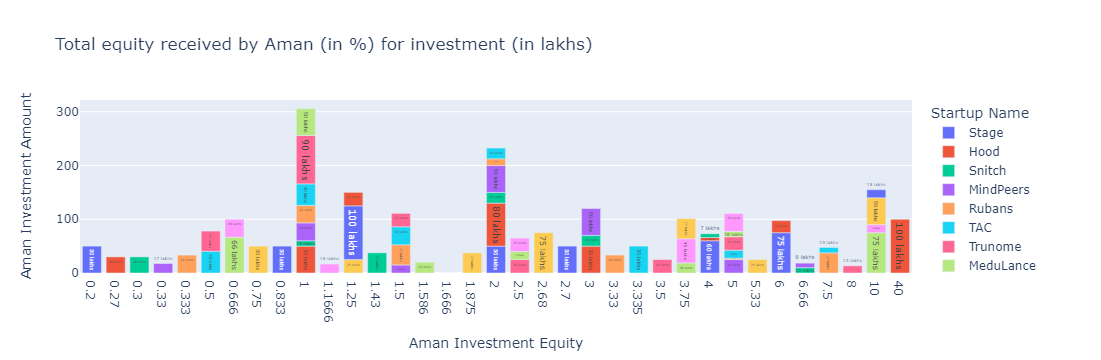

In [67]:
# Visualization Code
tmpdf = shark_tank.loc[shark_tank['Aman Investment Amount']>0] [["Startup Name","Aman Investment Amount","Aman Investment Equity"]].sort_values(by="Aman Investment Equity")
fig = px.bar(tmpdf, x="Aman Investment Equity", y='Aman Investment Amount', color="Startup Name", template='plotly', title="Total equity received by Aman (in %) for investment (in lakhs)", text=tmpdf['Aman Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

# PEYUSH'S INVESTMENT

In [68]:
# Finding the count of various Industries
shark_tank[shark_tank['Peyush Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False)

Industry
Medical/Health                  11
Manufacturing                   11
Food                             8
Technology/Software              8
Services                         8
Beauty/Fashion                   7
Education                        3
Agriculture                      2
Sports                           2
Liquor/Beverages                 2
Furnishing/Household             2
Animal/Pets                      1
Hardware                         1
Entertainment                    1
Vehicles/Electrical Vehicles     1
Name: count, dtype: int64

<Axes: ylabel='count'>

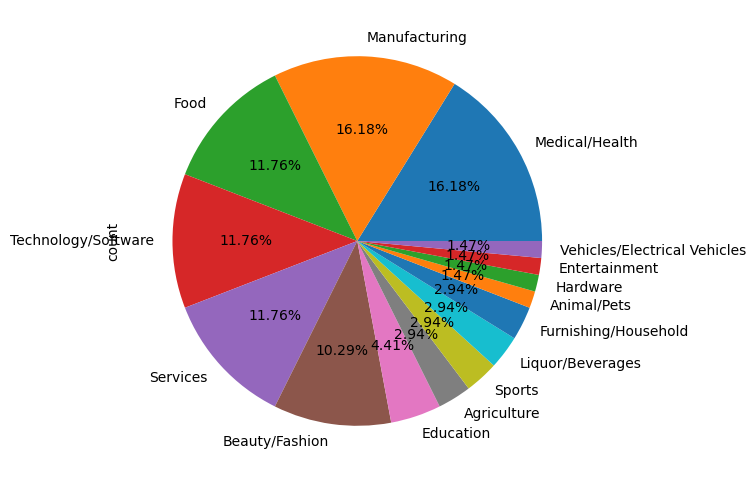

In [69]:
# Plotting the chart
plt.figure(figsize=(12,6))
shark_tank[shark_tank['Peyush Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')

In [70]:
# Viewing the DataFrame
tmpdf = shark_tank.loc[shark_tank['Peyush Investment Amount']>0] [["Startup Name","Peyush Investment Amount","Peyush Investment Equity"]].sort_values(by="Peyush Investment Equity")
tmpdf

Startup Name  Peyush Investment Amount  Peyush Investment Equity
159           Stage                      50.0                      0.20
277            Hood                      30.0                      0.27
209          Snitch                      30.0                      0.30
281         Trunome                      37.5                      0.50
279          GROWiT                      25.0                      0.50
..              ...                       ...                       ...
53       RoadBounce                      80.0                     20.00
44              PNT                      25.0                     25.00
77       KGAgrotech                      10.0                     40.00
82   IsakFragrances                      50.0                     50.00
66     Sid07Designs                      25.0                     75.00

[68 rows x 3 columns]

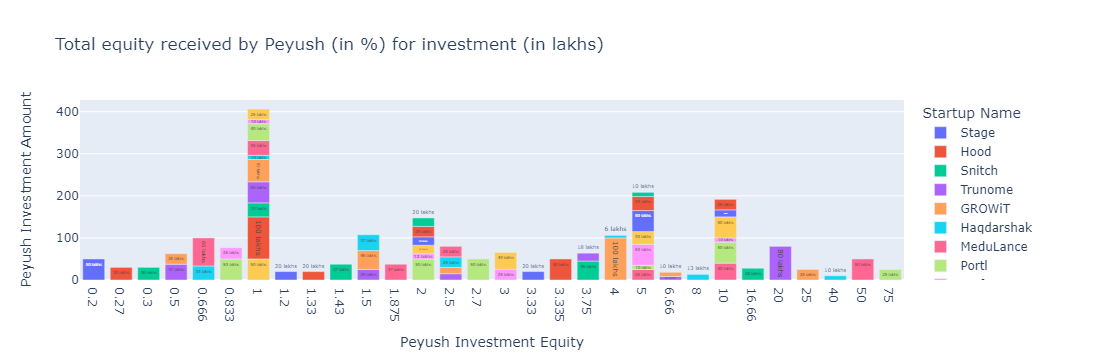

In [71]:
# Visualization Code
tmpdf = shark_tank.loc[shark_tank['Peyush Investment Amount']>0] [["Startup Name","Peyush Investment Amount","Peyush Investment Equity"]].sort_values(by="Peyush Investment Equity")
fig = px.bar(tmpdf, x="Peyush Investment Equity", y='Peyush Investment Amount', color="Startup Name", template='plotly', title="Total equity received by Peyush (in %) for investment (in lakhs)", text=tmpdf['Peyush Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

# GHAZAL'S INVESTMENT 

In [6]:
# Finding the count of various Industries
shark_tank[shark_tank['Ghazal Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False)

Industry
Food              3
Medical/Health    2
Manufacturing     2
Beauty/Fashion    1
Name: count, dtype: int64

<Axes: ylabel='count'>

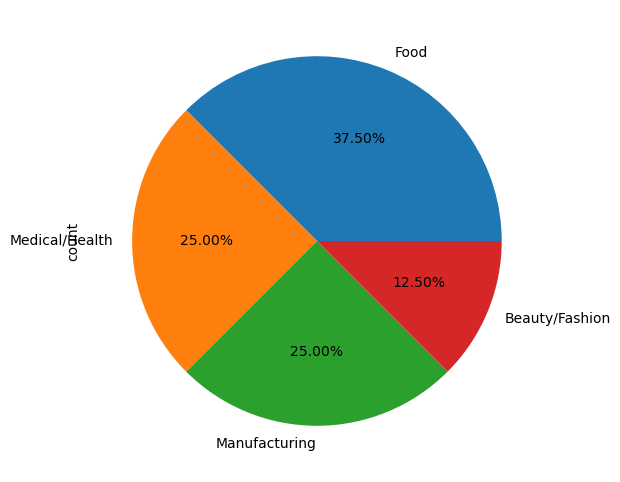

In [7]:
# Plotting the chart
plt.figure(figsize=(12,6))
shark_tank[shark_tank['Ghazal Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')

In [8]:
# Viewing the DataFrame
tmpdf = shark_tank.loc[shark_tank['Ghazal Investment Amount']>0] [["Startup Name","Ghazal Investment Amount","Ghazal Investment Equity"]].sort_values(by="Ghazal Investment Equity")
tmpdf

Startup Name  Ghazal Investment Amount  Ghazal Investment Equity
86    WattTechnovations                  0.000253                       1.0
80   SunfoxTechnologies                 20.000000                       1.2
89              HumpyA2                 33.330000                       5.0
111    NomadFoodProject                 10.000000                       5.0
122             WitBlox                 30.000000                       5.0
92           WakaoFoods                 25.000000                       7.0
91    GoldSafeSolutions                 16.660000                      10.0
76           TheSassBar                 25.000000                      17.5

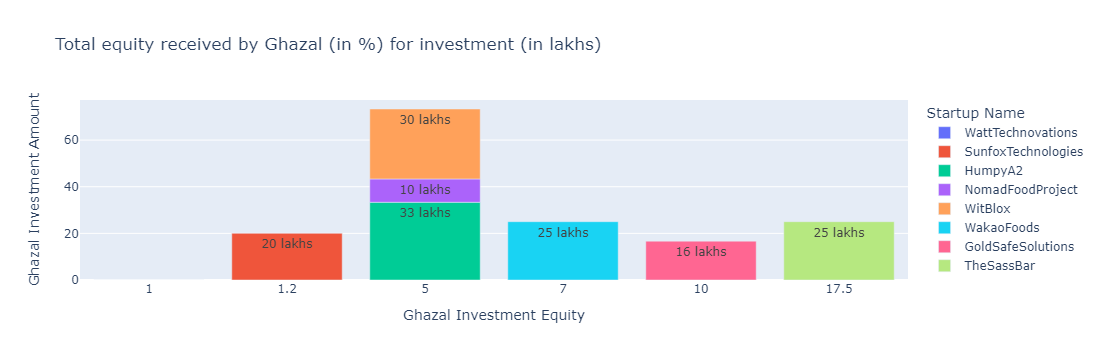

In [9]:
# Visualization Code
tmpdf = shark_tank.loc[shark_tank['Ghazal Investment Amount']>0] [["Startup Name","Ghazal Investment Amount","Ghazal Investment Equity"]].sort_values(by="Ghazal Investment Equity")
fig = px.bar(tmpdf, x="Ghazal Investment Equity", y='Ghazal Investment Amount', color="Startup Name", template='plotly', title="Total equity received by Ghazal (in %) for investment (in lakhs)", text=tmpdf['Ghazal Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

# AMIT'S INVESTMENT

In [10]:
# Finding the count of various Industries
shark_tank[shark_tank['Amit Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False)

Industry
Food                            6
Beauty/Fashion                  5
Medical/Health                  3
Services                        2
Technology/Software             2
Manufacturing                   1
Furnishing/Household            1
Vehicles/Electrical Vehicles    1
Name: count, dtype: int64

<Axes: ylabel='count'>

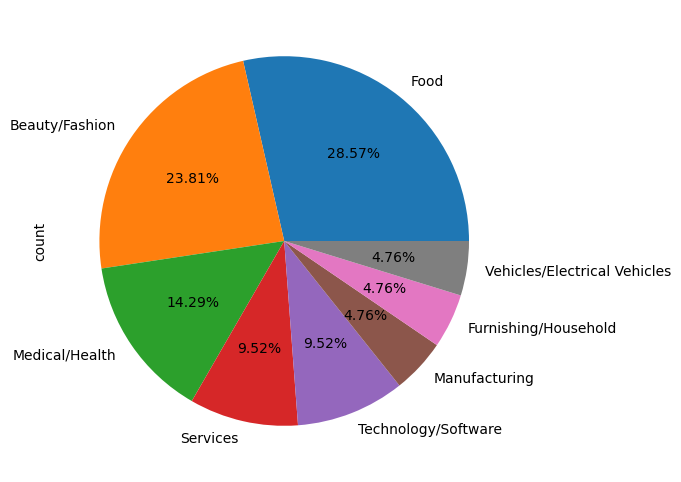

In [12]:
# Plotting the chart
plt.figure(figsize=(12,6))
shark_tank[shark_tank['Amit Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')

In [13]:
# Viewing the DataFrame
tmpdf = shark_tank.loc[shark_tank['Amit Investment Amount']>0] [["Startup Name","Amit Investment Amount","Amit Investment Equity"]].sort_values(by="Amit Investment Equity")
tmpdf

Startup Name  Amit Investment Amount  Amit Investment Equity
313         maisha                   10.00                  1.0000
274    Pharmallama                   40.00                  1.0000
230         UnStop                   50.00                  1.0000
273        GladFul                   16.66                  1.1666
290         Aadvik                   15.00                  1.5000
271        nawgati                   33.50                  1.5000
311      Sahayatha                   20.00                  2.0000
314       NishHair                  100.00                  2.0000
289        funngro                   25.00                  2.0800
266       Hornback                   50.00                  2.5000
195          Pflow                   30.00                  3.0000
187      InsideFPV                   18.75                  3.7500
226     ScrapUncle                   60.00                  5.0000
204      licksters                   25.00                  5.0000
310  ForeverModest                    5.00                  5.0000
191      MoppFoods                   75.00                  5.0000
193         Dobiee                   72.00                  6.5000
201         ekatra                   10.00                 10.0000
319       StyloBug                   80.00                 10.0000
188      Angrakhaa                   40.00                 20.0000
259    Cakelicious                   25.00                 20.0000

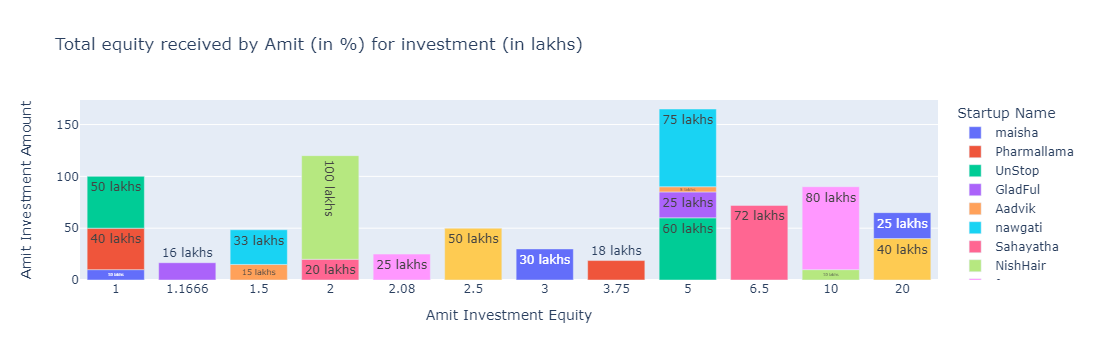

In [14]:
# Visualization Code
tmpdf = shark_tank.loc[shark_tank['Amit Investment Amount']>0] [["Startup Name","Amit Investment Amount","Amit Investment Equity"]].sort_values(by="Amit Investment Equity")
fig = px.bar(tmpdf, x="Amit Investment Equity", y='Amit Investment Amount', color="Startup Name", template='plotly', title="Total equity received by Amit (in %) for investment (in lakhs)", text=tmpdf['Amit Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

# GUEST'S INVESTMENT

In [15]:
# Printing the Guest's Name
print(f"The Guest's name is {shark_tank[shark_tank['Guest Name']=='Vikas']['Guest Name'].iloc[0]}.")

The Guest's name is Vikas.


In [16]:
# Finding the count of various Industries
shark_tank[shark_tank['Guest Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False)

Industry
Beauty/Fashion      1
Liquor/Beverages    1
Name: count, dtype: int64

<Axes: ylabel='count'>

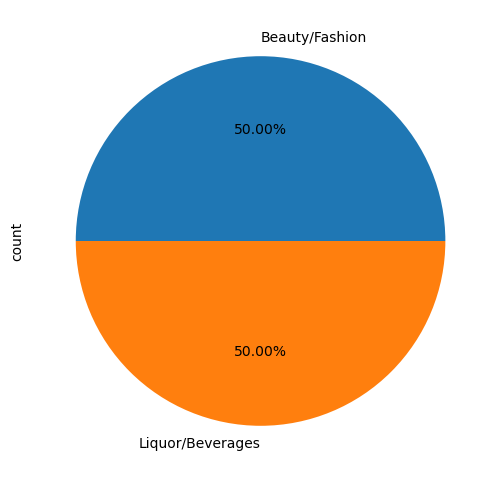

In [17]:
# Plotting the chart
plt.figure(figsize=(12,6))
shark_tank[shark_tank['Guest Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')

In [18]:
# Viewing the DataFrame
tmpdf = shark_tank.loc[shark_tank['Guest Investment Amount']>0] [["Startup Name","Guest Investment Amount","Guest Investment Equity"]].sort_values(by="Guest Investment Equity")
tmpdf

Startup Name  Guest Investment Amount  Guest Investment Equity
317          TAC                     40.5                      0.5
318   Naara-Aaba                     25.0                      2.5

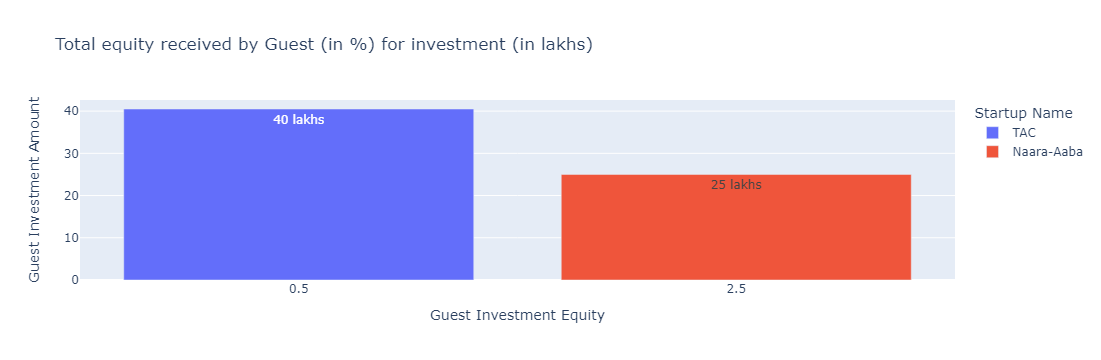

In [19]:
# Visualization Code
tmpdf = shark_tank.loc[shark_tank['Guest Investment Amount']>0] [["Startup Name","Guest Investment Amount","Guest Investment Equity"]].sort_values(by="Guest Investment Equity")
fig = px.bar(tmpdf, x="Guest Investment Equity", y='Guest Investment Amount', color="Startup Name", template='plotly', title="Total equity received by Guest (in %) for investment (in lakhs)", text=tmpdf['Guest Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

# Number of sharks in a deal

Number of sharks in deal
1.0    42%
2.0    31%
3.0    16%
4.0     7%
5.0     5%
Name: proportion, dtype: object


<Axes: xlabel='Number of sharks in deal', ylabel='count'>

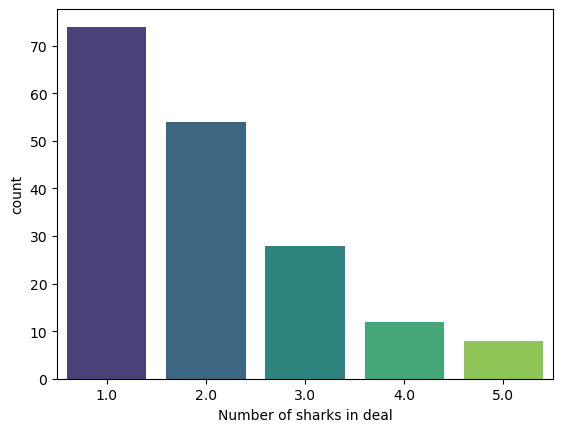

In [20]:
# Visualization Code
print(round(shark_tank['Number of sharks in deal'].value_counts(normalize=True) * 100).astype(str).str.replace('.0','%'))
sns.countplot(data=shark_tank,x='Number of sharks in deal',palette='viridis')

In [21]:
# The deal where more than or equal to 5 sharks were involved
tmdf = shark_tank[shark_tank['Number of sharks in deal'] >= 5][['Startup Name','Total Deal Amount','Total Deal Equity']]
tmdf

Startup Name  Total Deal Amount  Total Deal Equity
15        SkippiIcePops              100.0               15.0
50   FindYourKicksIndia               50.0               25.0
64               INACAN              100.0               10.0
80   SunfoxTechnologies              100.0                6.0
209              Snitch              150.0                1.5
239            Mahantam               30.0               20.0
274         Pharmallama              200.0                5.0
311           Sahayatha              100.0               10.0

# Total Amount Asked by the Pitchers

In [22]:
# Amount asked by the pitchers
print(format_currency(shark_tank['Original Ask Amount'].sum()/100,'INR',locale='en_IN').replace('.00',''), 'crores')

₹541.41 crores


# Total Amount Invested by the sharks

In [23]:
# Amount invested by the sharks
print(format_currency(shark_tank['Total Deal Amount'].sum()/100,'INR',locale='en_IN').replace('.00',''), 'crores')

₹110.06 crores


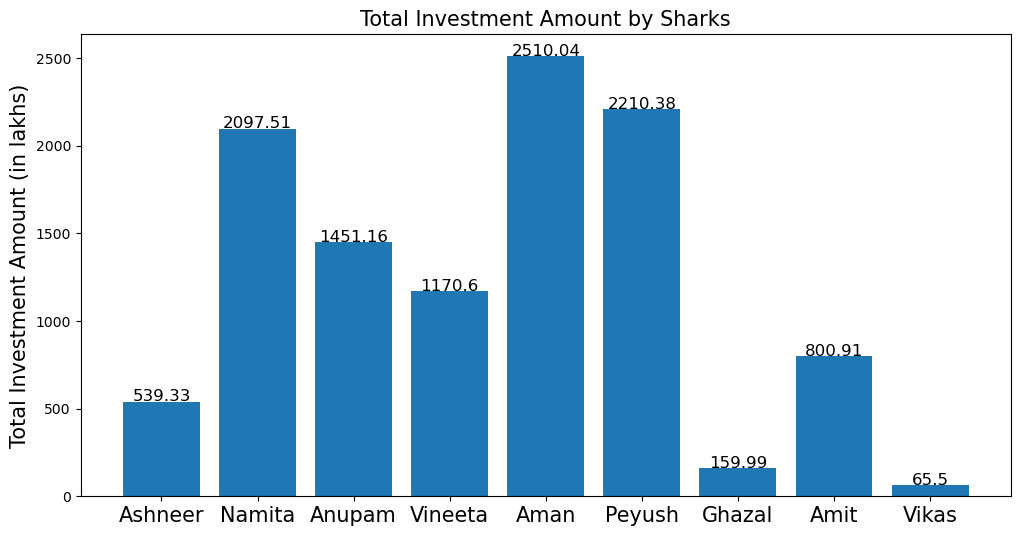

In [24]:
# Visualization Code
amount = [shark_tank['Ashneer Investment Amount'].sum(), shark_tank['Namita Investment Amount'].sum(), shark_tank['Anupam Investment Amount'].sum(), shark_tank['Vineeta Investment Amount'].sum(),
    shark_tank['Aman Investment Amount'].sum(), shark_tank['Peyush Investment Amount'].sum(), shark_tank['Ghazal Investment Amount'].sum(), shark_tank['Amit Investment Amount'].sum(), shark_tank['Guest Investment Amount'].sum()]
name=['Ashneer','Namita','Anupam','Vineeta','Aman','Peyush','Ghazal','Amit','Vikas']
df = {'Name':name, 'Total Amount':amount }
plt.figure(figsize=(12,6))
plt.bar(df['Name'], df['Total Amount'])
plt.xticks(fontsize=15)
plt.ylabel("Total Investment Amount (in lakhs)",fontsize=15)
for index,d in enumerate(amount):
    plt.text(x=index, y =d+2, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total Investment Amount by Sharks", fontsize=15)
plt.show()

# Total Amount Lent by the Sharks

In [25]:
# Amount invested by the sharks
print(format_currency(shark_tank['Total Deal Debt'].sum()/100,'INR',locale='en_IN').replace('.00',''), 'crores')

₹18.11 crores


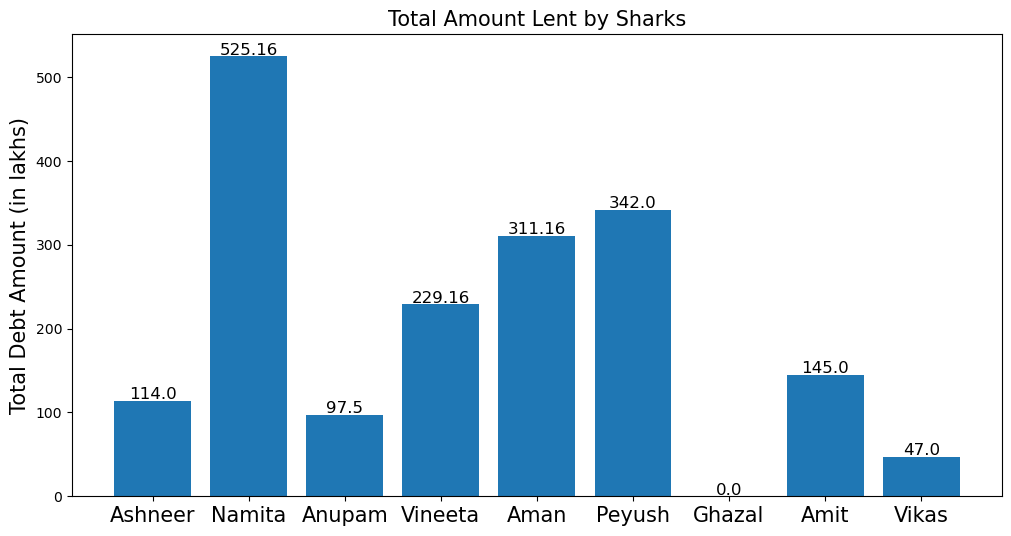

In [26]:
# Visualization Code
amount = [shark_tank['Ashneer Debt Amount'].sum(), shark_tank['Namita Debt Amount'].sum(), shark_tank['Anupam Debt Amount'].sum(), shark_tank['Vineeta Debt Amount'].sum(),
    shark_tank['Aman Debt Amount'].sum(), shark_tank['Peyush Debt Amount'].sum(), shark_tank['Ghazal Debt Amount'].sum(), shark_tank['Amit Debt Amount'].sum(), shark_tank['Guest Debt Amount'].sum()]
name=['Ashneer','Namita','Anupam','Vineeta','Aman','Peyush','Ghazal','Amit','Vikas']
df = {'Name':name, 'Total Amount':amount }
plt.figure(figsize=(12,6))
plt.bar(df['Name'], df['Total Amount'])
plt.xticks(fontsize=15)
plt.ylabel("Total Debt Amount (in lakhs)",fontsize=15)
for index,d in enumerate(amount):
    plt.text(x=index, y =d+2, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total Amount Lent by Sharks", fontsize=15)
plt.show()

# Portfolio's of Different sharks

# PEYUSH'S PORTFOLIO

In [27]:
print("Peyush Bansal's total investments =", shark_tank[shark_tank['Peyush Investment Amount']>0][['Peyush Investment Amount']].count().to_string()[-2:])
print("Investment amount by Peyush =", round(shark_tank['Peyush Investment Amount'].sum()/100, 2), "crores\n")
print("Equity received by Peyush =", round(shark_tank['Peyush Investment Equity'].sum(), 2), "% in different companies\n")
print("Debt/loan amount by Peyush =", round(shark_tank['Peyush Debt Amount'].sum()/100, 2), "crores\n")
print('-'*80)
print(shark_tank.loc[shark_tank['Peyush Investment Amount']>0][["Startup Name","Industry","Peyush Investment Amount"]].reset_index().drop('index',axis=1).head(30))

Peyush Bansal's total investments = 68
Investment amount by Peyush = 22.1 crores

Equity received by Peyush = 422.11 % in different companies

Debt/loan amount by Peyush = 3.42 crores

--------------------------------------------------------------------------------
          Startup Name             Industry  Peyush Investment Amount
0   VivalyfInnovations       Medical/Health                 28.000000
1                Ariro        Manufacturing                 25.000000
2              Nuutjob       Beauty/Fashion                  8.330000
3             Meatyour                 Food                 10.000000
4            EventBeep            Education                 10.000000
5                 LOKA  Technology/Software                 13.330000
6                Annie            Education                 35.000000
7           Carragreen        Manufacturing                 25.000000
8        TheYarnBazaar        Manufacturing                 25.000000
9                  PNT  Technology

# AMAN'S PORTFOLIO

In [28]:
print("Aman Gupta's total investments =", shark_tank[shark_tank['Aman Investment Amount']>0][['Aman Investment Amount']].count().to_string()[-2:])
print("Investment amount by Aman =", round(shark_tank['Aman Investment Amount'].sum()/100, 2), "crores\n")
print("Equity received by Aman =", round(shark_tank['Aman Investment Equity'].sum(), 2), "% in different companies\n")
print("Debt/loan amount by Aman =", round(shark_tank['Aman Debt Amount'].sum()/100, 2), "crores\n")
print('-'*80)
print(shark_tank.loc[shark_tank['Aman Investment Amount']>0][["Startup Name","Industry","Aman Investment Amount"]].reset_index().drop('index',axis=1).head(30))

Aman Gupta's total investments = 72
Investment amount by Aman = 25.1 crores

Equity received by Aman = 260.93 % in different companies

Debt/loan amount by Aman = 3.11 crores

--------------------------------------------------------------------------------
          Startup Name                      Industry  Aman Investment Amount
0        BluePineFoods                          Food               25.000000
1            Peeschute                Beauty/Fashion               75.000000
2               Bummer                Beauty/Fashion               37.500000
3           RevampMoto  Vehicles/Electrical Vehicles               50.000000
4        SkippiIcePops                          Food               20.000000
5    RaisingSuperstars                     Education               50.000000
6               Kavach                     Education                2.500000
7          BeyondSnack                          Food               25.000000
8                Altor                 Manufacturi

# GHAZAL'S PORTFOLIO

In [29]:
print("Ghazal Alagh's total investments =", shark_tank[shark_tank['Ghazal Investment Amount']>0][['Ghazal Investment Amount']].count().to_string()[-2:])
print("Investment amount by Ghazal =", round(shark_tank['Ghazal Investment Amount'].sum()/100, 2), "crores\n")
print("Equity received by Ghazal =", round(shark_tank['Ghazal Investment Equity'].sum(), 2), "% in different companies\n")
print("Debt/loan amount by Ghazal =", round(shark_tank['Ghazal Debt Amount'].sum()/100, 2), "crores\n")
print('-'*80)
print(shark_tank.loc[shark_tank['Ghazal Investment Amount']>0][["Startup Name","Industry","Ghazal Investment Amount"]].reset_index().drop('index',axis=1))

Ghazal Alagh's total investments =  8
Investment amount by Ghazal = 1.6 crores

Equity received by Ghazal = 51.7 % in different companies

Debt/loan amount by Ghazal = 0.0 crores

--------------------------------------------------------------------------------
         Startup Name        Industry  Ghazal Investment Amount
0          TheSassBar  Beauty/Fashion                 25.000000
1  SunfoxTechnologies  Medical/Health                 20.000000
2   WattTechnovations  Medical/Health                  0.000253
3             HumpyA2            Food                 33.330000
4   GoldSafeSolutions   Manufacturing                 16.660000
5          WakaoFoods            Food                 25.000000
6    NomadFoodProject            Food                 10.000000
7             WitBlox   Manufacturing                 30.000000


In [30]:
def str_splitter(s):
    # Split the input string using '/' as the delimiter
    s_split = s.split('/')

    # Check if the first part of the split string is 'Vehicles'
    if s_split[0] == 'Vehicles':
        # If it is, return the second part of the split string
        return s_split[1]
    else:
        # If it's not, return the string itself
        return s

In [31]:
# Applying the function to Industry Column
shark_tank['Industry'] = shark_tank['Industry'].apply(str_splitter)

# ASHNEER'S PORTFOLIO

In [32]:
print("Ashneer Grover's total investments =", shark_tank[shark_tank['Ashneer Investment Amount']>0][['Ashneer Investment Amount']].count().to_string()[-2:])
print("Investment amount by Ashneer =", round(shark_tank['Ashneer Investment Amount'].sum()/100, 2), "crores\n")
print("Equity received by Ashneer =", round(shark_tank['Ashneer Investment Equity'].sum(), 2), "% in different companies\n")
print("Debt/loan amount by Ashneer =", round(shark_tank['Ashneer Debt Amount'].sum()/100, 2), "crores\n")
print('-'*80)
print(shark_tank.loc[shark_tank['Ashneer Investment Amount']>0][["Startup Name","Industry","Ashneer Investment Amount"]].reset_index().drop('index',axis=1))
     

Ashneer Grover's total investments = 21
Investment amount by Ashneer = 5.39 crores

Equity received by Ashneer = 93.24 % in different companies

Debt/loan amount by Ashneer = 1.14 crores

--------------------------------------------------------------------------------
          Startup Name             Industry  Ashneer Investment Amount
0        BluePineFoods                 Food                      25.00
1         BoozScooters  Electrical Vehicles                      20.00
2            TagzFoods                 Food                      70.00
3        SkippiIcePops                 Food                      20.00
4    RaisingSuperstars            Education                      50.00
5          BeyondSnack                 Food                      25.00
6         MotionBreeze  Electrical Vehicles                      30.00
7            EventBeep            Education                      10.00
8        TheYarnBazaar        Manufacturing                      25.00
9          BambooIndi

# NAMITA'S PORTFOLIO

In [33]:
print("Namita Thapar's Total Investments =", shark_tank[shark_tank['Namita Investment Amount']>0][['Namita Investment Amount']].count().to_string()[-2:])
print("Investment amount by Namita =", round(shark_tank['Namita Investment Amount'].sum()/100, 2), "crores\n")
print("Equity received by Namita =", round(shark_tank['Namita Investment Equity'].sum(), 2), "% in different companies\n")
print("Debt/loan amount by Namita =", round(shark_tank['Namita Debt Amount'].sum()/100, 2), "crores\n")
print('-'*80)
print(shark_tank.loc[shark_tank['Namita Investment Amount']>0][["Startup Name","Industry","Namita Investment Amount"]].reset_index().drop('index',axis=1).head(30))
     

Namita Thapar's Total Investments = 66
Investment amount by Namita = 20.98 crores

Equity received by Namita = 301.59 % in different companies

Debt/loan amount by Namita = 5.25 crores

--------------------------------------------------------------------------------
          Startup Name        Industry  Namita Investment Amount
0          JhaJiAchaar            Food                 28.300000
1               Bummer  Beauty/Fashion                 37.500000
2        SkippiIcePops            Food                 20.000000
3         Menstrupedia       Education                 50.000000
4                Altor   Manufacturing                 25.000000
5              Nuutjob  Beauty/Fashion                  8.330000
6                Farda  Beauty/Fashion                 15.000000
7                 Auli  Beauty/Fashion                 75.000000
8                Annie       Education                 35.000000
9      TheRenalProject  Medical/Health                 50.000000
10             Coc

# ANUPAM'S PORTFOLIO

In [34]:
print("Anupam Mittal's total investments =", shark_tank[shark_tank['Anupam Investment Amount']>0][['Anupam Investment Amount']].count().to_string()[-2:])
print("Investment amount by Anupam =", round(shark_tank['Anupam Investment Amount'].sum()/100, 2), "crores\n")
print("Equity received by Anupam =", round(shark_tank['Anupam Investment Equity'].sum(), 2), "% in different companies\n")
print("Debt/loan amount by Anupam =", round(shark_tank['Anupam Debt Amount'].sum()/100, 2), "crores\n")
print('-'*80)
print(shark_tank.loc[shark_tank['Anupam Investment Amount']>0][["Startup Name","Industry","Anupam Investment Amount"]].reset_index().drop('index',axis=1).head(30))
     

Anupam Mittal's total investments = 50
Investment amount by Anupam = 14.51 crores

Equity received by Anupam = 305.83 % in different companies

Debt/loan amount by Anupam = 0.98 crores

--------------------------------------------------------------------------------
              Startup Name             Industry  Anupam Investment Amount
0         HeartUpMySleeves       Beauty/Fashion                 12.500000
1                    CosIQ       Beauty/Fashion                 25.000000
2               RevampMoto  Electrical Vehicles                 50.000000
3            SkippiIcePops                 Food                 20.000000
4                   Kavach            Education                  2.500000
5       VivalyfInnovations       Medical/Health                 28.000000
6                 Meatyour                 Food                 10.000000
7   ARRCOATSurfaceTextures        Manufacturing                 50.000000
8                     LOKA  Technology/Software                 13.

# VINEETA'S PORTFOLIO

In [35]:
print("Vineeta Singh's total investments =", shark_tank[shark_tank['Vineeta Investment Amount']>0][['Vineeta Investment Amount']].count().to_string()[-2:])
print("Investment amount by Vineeta =", round(shark_tank['Vineeta Investment Amount'].sum()/100, 2), "crores\n")
print("Equity received by Vineeta =", round(shark_tank['Vineeta Investment Equity'].sum(), 2), "% in different companies\n")
print("Debt/loan amount by Vineeta =", round(shark_tank['Vineeta Debt Amount'].sum()/100, 2), "crores\n")
print('-'*80)
print(shark_tank.loc[shark_tank['Vineeta Investment Amount']>0][["Startup Name","Industry","Vineeta Investment Amount"]].reset_index().drop('index',axis=1).head(30))

Vineeta Singh's total investments = 43
Investment amount by Vineeta = 11.71 crores

Equity received by Vineeta = 242.3 % in different companies

Debt/loan amount by Vineeta = 2.29 crores

--------------------------------------------------------------------------------
          Startup Name              Industry  Vineeta Investment Amount
0        BluePineFoods                  Food                      25.00
1         BoozScooters   Electrical Vehicles                      20.00
2     HeartUpMySleeves        Beauty/Fashion                      12.50
3                 NOCD                  Food                      20.00
4                CosIQ        Beauty/Fashion                      25.00
5          JhaJiAchaar                  Food                      28.30
6        SkippiIcePops                  Food                      20.00
7           Get-A-Whey                  Food                      33.33
8       TheQuirkyNaari        Beauty/Fashion                      17.50
9   SunfoxT

# AMIT'S PORTFOLIO

In [36]:
print("Amit Jain's total investments =", shark_tank[shark_tank['Amit Investment Amount']>0][['Amit Investment Amount']].count().to_string()[-2:])
print("Investment amount by Amit =", round(shark_tank['Amit Investment Amount'].sum()/100, 2), "crores\n")
print("Equity received by Amit =", round(shark_tank['Amit Investment Equity'].sum(), 2), "% in different companies\n")
print("Debt/loan amount by Amit =", round(shark_tank['Amit Debt Amount'].sum()/100, 2), "crores\n")
print('-'*80)
print(shark_tank.loc[shark_tank['Amit Investment Amount']>0][["Startup Name","Industry","Amit Investment Amount"]].reset_index().drop('index',axis=1).head(30))

Amit Jain's total investments = 21
Investment amount by Amit = 8.01 crores

Equity received by Amit = 109.0 % in different companies

Debt/loan amount by Amit = 1.45 crores

--------------------------------------------------------------------------------
     Startup Name              Industry  Amit Investment Amount
0       InsideFPV         Manufacturing                   18.75
1       Angrakhaa        Beauty/Fashion                   40.00
2       MoppFoods                  Food                   75.00
3          Dobiee                  Food                   72.00
4           Pflow        Medical/Health                   30.00
5          ekatra  Furnishing/Household                   10.00
6       licksters                  Food                   25.00
7      ScrapUncle              Services                   60.00
8          UnStop   Technology/Software                   50.00
9     Cakelicious                  Food                   25.00
10       Hornback   Electrical Vehicles  

# GUEST'S PORTFOLIO

In [37]:
print("Vikas D. Nahar's total investments =", shark_tank[shark_tank['Guest Investment Amount']>0][['Guest Investment Amount']].count().to_string()[-2:])
print("Investment amount by Vikas =", round(shark_tank['Guest Investment Amount'].sum()/100, 2), "crores\n")
print("Equity received by Vikas =", round(shark_tank['Guest Investment Equity'].sum(), 2), "% in different companies\n")
print("Debt/loan amount by Vikas =", round(shark_tank['Guest Debt Amount'].sum()/100, 2), "crores\n")
print('-'*80)
print(shark_tank.loc[shark_tank['Guest Investment Amount']>0][["Startup Name","Industry","Guest Investment Amount"]].reset_index().drop('index',axis=1).head(30))

Vikas D. Nahar's total investments =  2
Investment amount by Vikas = 0.66 crores

Equity received by Vikas = 3.0 % in different companies

Debt/loan amount by Vikas = 0.47 crores

--------------------------------------------------------------------------------
  Startup Name          Industry  Guest Investment Amount
0          TAC    Beauty/Fashion                     40.5
1   Naara-Aaba  Liquor/Beverages                     25.0


# Top Investments as per Equity Amount

In [38]:
# Displaying the DataFrame
df1 = pd.DataFrame(shark_tank.groupby('Startup Name')['Total Deal Equity'].max().nlargest(15)).reset_index()
df1

Startup Name  Total Deal Equity
0         Sid07Designs              75.00
1         BoozScooters              50.00
2       IsakFragrances              50.00
3      HammerLifestyle              40.00
4           KGAgrotech              40.00
5           TheSassBar              35.00
6   VivalyfInnovations              33.33
7    GoldSafeSolutions              30.00
8     HeartUpMySleeves              30.00
9         JainShikanji              30.00
10     ColourMeMad-CMM              25.00
11               CosIQ              25.00
12  FindYourKicksIndia              25.00
13           HoloKitab              25.00
14                 PNT              25.00

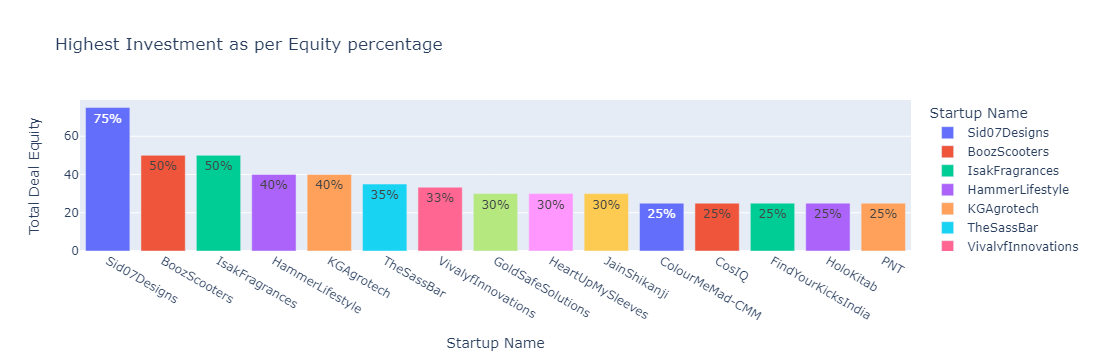

In [39]:
# Visualization Code
fig = px.bar(df1, x="Startup Name", y='Total Deal Equity', color="Startup Name", template='plotly', title="Highest Investment as per Equity percentage", text=df1['Total Deal Equity'].map(int).map(str)+'%')
fig.show()

# Top investments as per Loan Amount

In [40]:
# Displaying the DataFrame
df1 = pd.DataFrame(shark_tank.groupby('Startup Name')['Total Deal Debt'].max().nlargest(15)).reset_index()
df1

Startup Name  Total Deal Debt
0               Stage            150.0
1   WatchoutWearables            100.0
2            uBreathe            100.0
3                Otua             99.0
4               Wol3D             70.0
5                 TAC             69.0
6              maisha             65.0
7                Hood             60.0
8               iMumz             60.0
9             AyuSynk             50.0
10          DailyDump             50.0
11         Freebowler             50.0
12             GROWiT             50.0
13        LilGoodness             50.0
14        NamhyaFoods             50.0

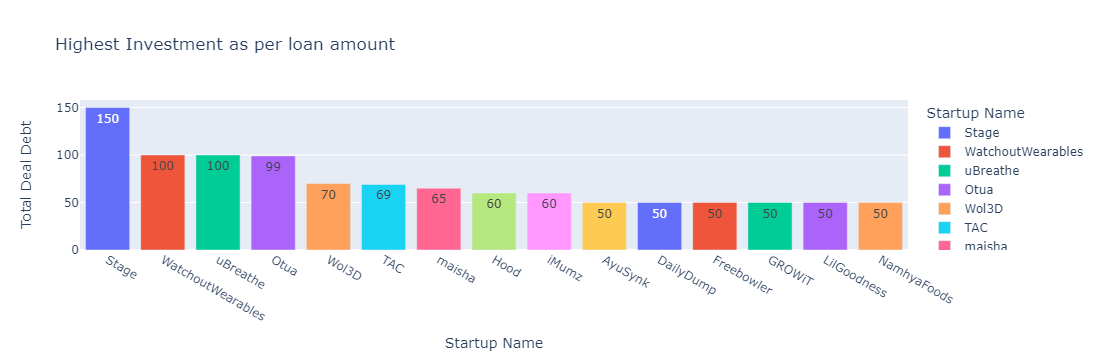

In [41]:
# Visualization Code
fig = px.bar(df1, x="Startup Name", y='Total Deal Debt', color="Startup Name", template='plotly', title="Highest Investment as per loan amount", text=df1['Total Deal Debt'])
fig.show()

# Total Equity Received By Sharks

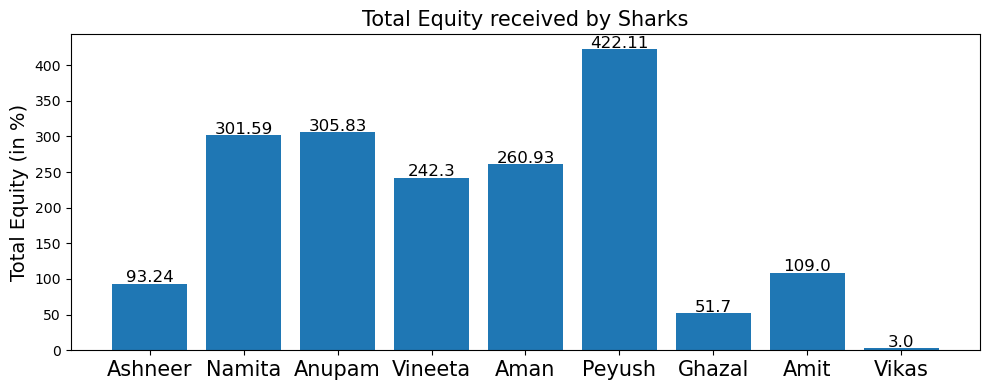

In [42]:
# Visualization Code
equity = [shark_tank['Ashneer Investment Equity'].sum(), shark_tank['Namita Investment Equity'].sum(), shark_tank['Anupam Investment Equity'].sum(), shark_tank['Vineeta Investment Equity'].sum(),
    shark_tank['Aman Investment Equity'].sum(), shark_tank['Peyush Investment Equity'].sum(), shark_tank['Ghazal Investment Equity'].sum(), shark_tank['Amit Investment Equity'].sum(), shark_tank['Guest Investment Equity'].sum()]
name=['Ashneer','Namita','Anupam','Vineeta','Aman','Peyush','Ghazal','Amit','Vikas']
df = pd.DataFrame({'Name':name, 'Total Equity':equity })
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Equity'])
plt.xticks(fontsize=15)
plt.ylabel("Total Equity (in %)",fontsize=14)
for index,d in enumerate(equity):
    plt.text(x=index, y =d+2, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total Equity received by Sharks", fontsize=15)
plt.tight_layout()
plt.show()

# Companies who got the same valuation as they requested

In [43]:
# Displaying the DataFrame
df3 = pd.DataFrame(shark_tank[shark_tank['Valuation Requested'] == shark_tank['Deal Valuation']][['Startup Name','Valuation Requested','Deal Valuation']].reset_index().drop('index',axis=1))
df3

Startup Name  Valuation Requested  Deal Valuation
0              Kavach                 50.0            50.0
1         BeyondSnack               2000.0          2000.0
2             Cocofit                  0.0             0.0
3   WattTechnovations                  0.0             0.0
4      TheSimplySalad                300.0           300.0
5             Janitri               4000.0          4000.0
6           NeoMotion              10000.0         10000.0
7             PadCare               2500.0          2500.0
8              Geeani               1000.0          1000.0
9           MindPeers               5300.0          5300.0
10        DhruvVidyut                  0.0             0.0
11    TheHealthyBinge               1000.0          1000.0
12          Sahayatha               1000.0          1000.0
13           NishHair               5000.0          5000.0

# Some companies were on pre-revenue or didn't have any revenue (as of pitching day)

In [44]:
df4 = shark_tank[shark_tank['Yearly Revenue'] == 0]['Startup Name'].reset_index().drop('index',axis=1)
print(f'There were {len(df4)} startups that were on pre-revenue on the pitching day.')
df4

There were 13 startups that were on pre-revenue on the pitching day.


Startup Name
0      MotionBreeze
1     GoodGoodPiggy
2   JulaaAutomation
3          Scholify
4        Sabjikothi
5           On2Cook
6         Scintiglo
7          Sayonara
8               PMV
9           CureSee
10        HoloKitab
11             Hood
12        WaggyZone

# Use of WordCloud to visualize the most frequently used keywords in startup names

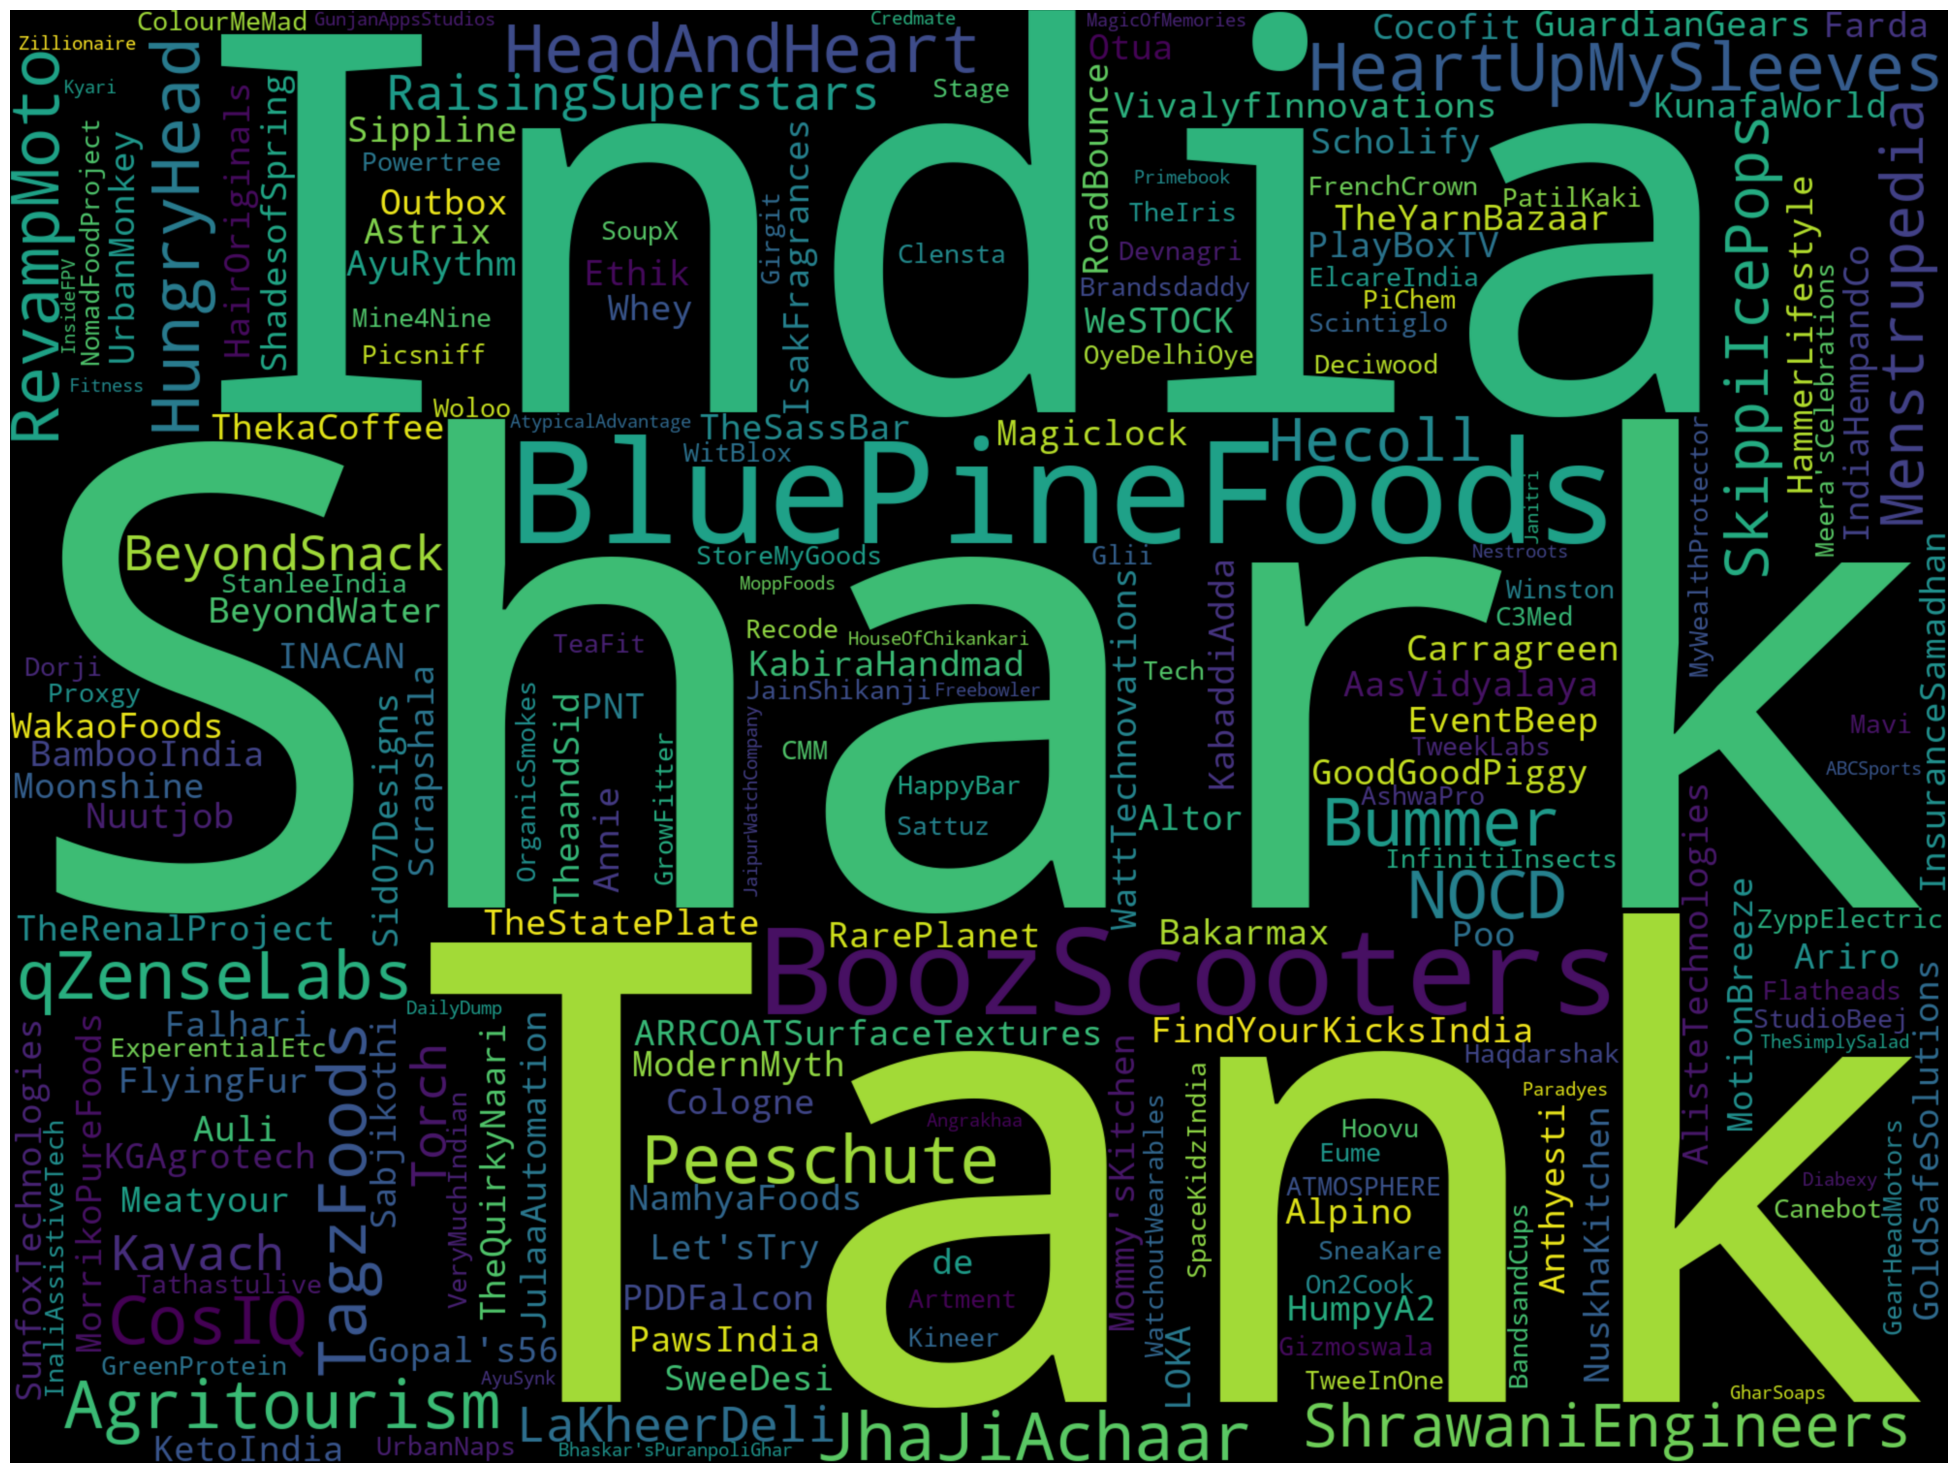

In [47]:
# Text Data
text = " Shark Tank India ".join(cat for cat in shark_tank['Startup Name'])
stop_words = list(STOPWORDS)

# Create WordCloud object
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='black', colormap='viridis', collocations=False, random_state=2022).generate(text)

# Display the WordCloud using Matplotlib
plt.figure(figsize=(25,20))
plt.imshow(wordcloud, interpolation='bicubic')
plt.axis("off")
plt.show()